## Run Tomtom analysis

In [11]:
import pandas as pd
import seaborn as sns
import pybedtools
import matplotlib.pyplot as plt
#import MATOM
import os
from scipy.stats import ranksums
import scipy.stats
import numpy as np
from math import log

%matplotlib inline

### The following python moduls are required for the analysis carried out in the paper:
* ipython==4.2.0
* jupyter==1.0.0
* numpy==1.10.4
* pandas==0.17.1
* gimmemotifs==0.8.5
* matplotlib==1.4.3
* scipy==0.16.0
* seaborn==0.5.1
* pybedtools==0.7.6

### Non-python modules are:

* meme v4.11.1
* bedtools v2.24.0

### First run tomtom pairwise comparison

### These utility function will be used for data cleaning and processing

In [401]:
tomtom = pd.read_table("/home/kipkurui/Project/MAT_server/MATOM/static/files/compare/94/max/max_tomtom.txt")

tomtom["p-value"] += 0.000000000000000000000000000000000000000000000001

tomtom["p-value"] = -tomtom["p-value"].apply(log)

tomtom = tomtom[["#Query ID", "Target ID", "p-value"]]

tomtom.columns = [["Query_ID", "Target_ID", "Score"]]

tomtom_matrix = tomtom.pivot(index="Query_ID", columns="Target_ID", values="Score")


### Reduce effect of extreme outliers by winzorizing the data

In [345]:
tomtom_winz = pd.DataFrame(scipy.stats.mstats.winsorize(np.array(tomtom_matrix.values.T.tolist()),
                                                     limits=0.05), index=tomtom_matrix.index, columns=tomtom_matrix.columns)

### Normalize the data by the maximum value

In [346]:
tomtom_normalized = tomtom_winz /tomtom_winz.max()

### Add a new average column to the matrix and sort the mean in ascending order

In [347]:
tomtom_normalized["Average"] = tomtom_normalized.mean()
tomtom_normalized.sort_values(by="Average", ascending=False, inplace=True)
tomtom_normalized.loc["Average"] = tomtom_normalized.mean(axis=0)
tomtom_normalized = tomtom_normalized.T
tomtom_normalized.sort_values(by="Average", axis=0, ascending=False, inplace=True)
tomtom_normalized.drop("Average", axis=0, inplace=True)

In [350]:
tomtom_normalized

Query_ID,Max.HOMER,MAX.1_1.ZLAB,UP00060_1.UNIPROBE,MAX_f1.HOCOMOCO,Max_1.GUERTIN,MAX_DBD_2.JOLMA,UP00060.4.ZHAO2011,M1889_1.02.CIS-BP,MA0058.2.JASPAR,MAX_DBD_1.JOLMA,...,UP00060.1.ZHAO2011,Max_1.3DFOOTPRINT,MAX.1_4.ZLAB,Max.TF2DNA,Max_2.GUERTIN,Max_3.GUERTIN,MAX.1_5.ZLAB,Max_4.GUERTIN,MAX.1_3.ZLAB,Average
Target_ID,,,,,,,,,,,,,,,,,,,,,
Max.HOMER,1.000000,0.825942,0.995680,0.606052,0.739237,0.903800,0.557864,0.446385,0.446385,0.693057,...,0.352462,0.121486,0.105819,0.040857,0.074093,0.001787,0.027651,0.000499,0.000307,0.401566
MAX.1_1.ZLAB,0.843632,1.000000,0.786442,0.760212,1.000000,0.706913,0.395262,0.426084,0.426084,0.562312,...,0.284382,0.114795,0.111329,0.053037,0.043850,0.003428,0.039015,0.004896,0.000389,0.381202
UP00060_1.UNIPROBE,1.000000,0.831103,1.000000,0.751621,0.683007,0.713998,0.434694,0.377826,0.377826,0.556393,...,0.298083,0.118542,0.086943,0.026469,0.049178,0.010167,0.020765,0.000307,0.000307,0.363086
MAX_f1.HOCOMOCO,0.637278,0.807621,0.733684,1.000000,0.489625,0.756824,0.537091,0.426513,0.426513,0.518837,...,0.327552,0.116388,0.131834,0.037323,0.038743,0.004431,0.009413,0.001375,0.000307,0.357412
Max_1.GUERTIN,0.732448,1.000000,0.664235,0.523645,1.000000,0.613698,0.343083,0.376924,0.376924,0.712834,...,0.297937,0.125077,0.100529,0.057236,0.051908,0.002905,0.021762,0.004572,0.001603,0.353650
MAX_DBD_2.JOLMA,0.817295,0.653538,0.623419,0.665468,0.532255,1.000000,0.471608,0.447758,0.447758,0.517793,...,0.383355,0.115879,0.127304,0.039548,0.040176,0.004056,0.011998,0.001682,0.000307,0.352568
UP00060.4.ZHAO2011,0.481569,0.297015,0.330636,0.413086,0.372948,0.432883,1.000000,0.231847,0.231847,0.365050,...,0.091667,0.064174,0.104580,0.044528,0.146911,0.023241,0.112810,0.000307,0.014088,0.307191
MA0058.2.JASPAR,0.474462,0.444197,0.383244,0.450295,0.379320,0.509129,0.299634,1.000000,1.000000,0.327542,...,0.272873,0.130629,0.114689,0.146740,0.068921,0.047450,0.036708,0.000307,0.001187,0.295247
M1889_1.02.CIS-BP,0.474462,0.444197,0.383244,0.450295,0.379320,0.509129,0.299634,1.000000,1.000000,0.327542,...,0.272873,0.130629,0.114689,0.146740,0.068921,0.047450,0.036708,0.000307,0.001187,0.295247


### Save the data into a file

In [348]:

tomtom_normalized.to_csv("Tomtom_raw.txt", sep="\t")

### Plot the figures required

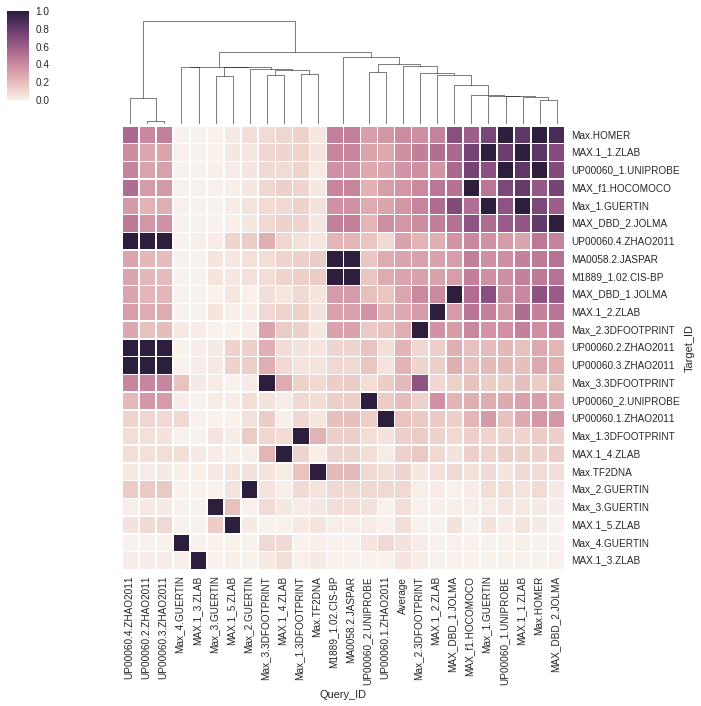

In [349]:
cg = sns.clustermap(tomtom_normalized, method='single', metric="euclidean", row_cluster=False, linewidths=.15)
test = plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
test = plt.setp(cg.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)

### Bringing all of them together

In [277]:
# from scipy.stats.mstats import winsorize

# def clean_tomtom(tom_in, tom_out):
#     tomtom = pd.read_table(tom_in, index_col="#Query ID")
#     tomtom["p-value"] = -tomtom["p-value"].apply(log)

#     tomtom = tomtom[["Target ID", "p-value"]]

#     tomtom.columns = [["Target_ID", "Score"]]

#     tomtom_matrix = tomtom.pivot(columns="Target_ID", values="Score")

#     #Winsorize to reduce efec of outliers
#     tomtom_winz = pd.DataFrame(
#         winsorize(np.array(tomtom_matrix.values.T.tolist()),
#             limits=0.05), index=tomtom_matrix.index, columns=tomtom_matrix.columns)
    
#     #Normalize
#     tomtom_normalized = tomtom_winz /tomtom_winz.max()

#     tomtom_normalized["Average"] = tomtom_normalized.mean()
#     tomtom_normalized.sort_values(by="Average", ascending=False, inplace=True)
#     tomtom_normalized.loc["Average"] = tomtom_normalized.mean(axis=0)
#     tomtom_normalized = tomtom_normalized.T
#     tomtom_normalized.sort_values(by="Average", axis=0, ascending=False, inplace=True)
#     tomtom_normalized.drop("Average", axis=0, inplace=True)
    
    
#     #Save the data to file
#     tomtom_normalized.to_csv("%s" % tom_out, sep="\t")

        
#     return tomtom_normalized
    

# def plot_tomtom(tom_in, figure_output):
    
#     tomtom_normalized = pd.read_table(tom_in, index_col="Target_ID")
    
#     cg = sns.clustermap(tomtom_normalized, method='single', metric="euclidean",
#                         row_cluster=False, linewidths=.15)
#     test = plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
#     test = plt.setp(cg.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
    
#     fig = plt.gcf()
#     fig.savefig(figure_output, bbox_inches='tight')
    

In [ ]:
from scipy.stats.mstats import winsorize

In [405]:
def clean_tomtom(tom_in, tom_out):

    tomtom = pd.read_table(tom_in)

    tomtom["p-value"] += 0.000000000000000000000000000000000000000000000001

    tomtom["p-value"] = -tomtom["p-value"].apply(log)

    tomtom = tomtom[["#Query ID", "Target ID", "p-value"]]

    tomtom.columns = [["Query_ID", "Target_ID", "Score"]]

    tomtom_matrix = tomtom.pivot(index="Query_ID", columns="Target_ID", values="Score")

    #tomtom_matrix.drop_duplicates(inplace=True)
    # Winsorize to reduce effect of outliers
    
    #tomtom_winz = pd.DataFrame(winsorize(np.array(tomtom_matrix.values.T.tolist()),
                                                     #limits=0.05), index=tomtom_matrix.index, columns=tomtom_matrix.columns)
    
    tomtom_winz = pd.DataFrame(
        winsorize(np.array(tomtom_matrix.values.T.tolist()),
                  limits=0.05), index=tomtom_matrix.index, columns=tomtom_matrix.columns)

    # Normalize

    tomtom_normalized = tomtom_winz / tomtom_winz.max()

    tomtom_normalized["Average"] = tomtom_normalized.mean()
    tomtom_normalized.sort_values(by="Average", ascending=False, inplace=True)
    tomtom_normalized.loc["Average"] = tomtom_normalized.mean(axis=0)
    tomtom_normalized = tomtom_normalized.T
    tomtom_normalized.sort_values(by="Average", axis=0, ascending=False, inplace=True)
    tomtom_normalized.drop("Average", axis=0, inplace=True)

    # Save the data to file
    tomtom_normalized.to_csv("%s" % tom_out, sep="\t")

    return tomtom_normalized


def plot_tomtom(tom_in, figure_output):

    tomtom_normalized = pd.read_table(tom_in, index_col="Target_ID")

    cg = sns.clustermap(tomtom_normalized, method='single', metric="euclidean",
                        row_cluster=False, linewidths=.15)
    test = plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
    test = plt.setp(cg.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)

    fig = plt.gcf()
    fig.savefig(figure_output, bbox_inches='tight')


In [407]:
tom_in  = "/home/kipkurui/Project/MAT_server/MATOM/static/files/compare/94/max/max_tomtom.txt"
tom_out = "/home/kipkurui/Project/MAT_server/MATOM/static/files/compare/94/max/max_tomtom-10.txt"
clean_tomtom(tom_in, tom_out)

Query_ID,Max.HOMER,MAX.1_1.ZLAB,UP00060_1.UNIPROBE,MAX_f1.HOCOMOCO,Max_1.GUERTIN,MAX_DBD_2.JOLMA,UP00060.4.ZHAO2011,M1889_1.02.CIS-BP,MA0058.2.JASPAR,MAX_DBD_1.JOLMA,...,UP00060.1.ZHAO2011,Max_1.3DFOOTPRINT,MAX.1_4.ZLAB,Max.TF2DNA,Max_2.GUERTIN,Max_3.GUERTIN,MAX.1_5.ZLAB,Max_4.GUERTIN,MAX.1_3.ZLAB,Average
Target_ID,,,,,,,,,,,,,,,,,,,,,
Max.HOMER,1.000000,0.825942,0.995680,0.606052,0.739237,0.903800,0.557864,0.446385,0.446385,0.693057,...,0.352462,0.121486,0.105819,0.040857,0.074093,0.001787,0.027651,0.000499,0.000307,0.401566
MAX.1_1.ZLAB,0.843632,1.000000,0.786442,0.760212,1.000000,0.706913,0.395262,0.426084,0.426084,0.562312,...,0.284382,0.114795,0.111329,0.053037,0.043850,0.003428,0.039015,0.004896,0.000389,0.381202
UP00060_1.UNIPROBE,1.000000,0.831103,1.000000,0.751621,0.683007,0.713998,0.434694,0.377826,0.377826,0.556393,...,0.298083,0.118542,0.086943,0.026469,0.049178,0.010167,0.020765,0.000307,0.000307,0.363086
MAX_f1.HOCOMOCO,0.637278,0.807621,0.733684,1.000000,0.489625,0.756824,0.537091,0.426513,0.426513,0.518837,...,0.327552,0.116388,0.131834,0.037323,0.038743,0.004431,0.009413,0.001375,0.000307,0.357412
Max_1.GUERTIN,0.732448,1.000000,0.664235,0.523645,1.000000,0.613698,0.343083,0.376924,0.376924,0.712834,...,0.297937,0.125077,0.100529,0.057236,0.051908,0.002905,0.021762,0.004572,0.001603,0.353650
MAX_DBD_2.JOLMA,0.817295,0.653538,0.623419,0.665468,0.532255,1.000000,0.471608,0.447758,0.447758,0.517793,...,0.383355,0.115879,0.127304,0.039548,0.040176,0.004056,0.011998,0.001682,0.000307,0.352568
UP00060.4.ZHAO2011,0.481569,0.297015,0.330636,0.413086,0.372948,0.432883,1.000000,0.231847,0.231847,0.365050,...,0.091667,0.064174,0.104580,0.044528,0.146911,0.023241,0.112810,0.000307,0.014088,0.307191
MA0058.2.JASPAR,0.474462,0.444197,0.383244,0.450295,0.379320,0.509129,0.299634,1.000000,1.000000,0.327542,...,0.272873,0.130629,0.114689,0.146740,0.068921,0.047450,0.036708,0.000307,0.001187,0.295247
M1889_1.02.CIS-BP,0.474462,0.444197,0.383244,0.450295,0.379320,0.509129,0.299634,1.000000,1.000000,0.327542,...,0.272873,0.130629,0.114689,0.146740,0.068921,0.047450,0.036708,0.000307,0.001187,0.295247


In [408]:
tom_in  = "/home/kipkurui/Project/MAT_server/MATOM/static/files/compare/94/max/max_tomtom.txt"
tom_out = "/home/kipkurui/Project/MAT_server/MATOM/static/files/compare/94/max/max_tomtom-10.txt"

tomtom = pd.read_table(tom_in)

tomtom["p-value"] += 0.000000000000000000000000000000000000000000000001

tomtom["p-value"] = -tomtom["p-value"].apply(log)

tomtom = tomtom[["#Query ID", "Target ID", "p-value"]]

tomtom.columns = [["Query_ID", "Target_ID", "Score"]]

tomtom_matrix = tomtom.pivot(index="Query_ID", columns="Target_ID", values="Score")

tomtom_matrix.drop_duplicates(inplace=True)

tomtom_matrix = tomtom_matrix.T

tomtom_matrix.drop_duplicates(inplace=True)

# Winsorize to reduce effect of outliers

#tomtom_winz = pd.DataFrame(winsorize(np.array(tomtom_matrix.values.T.tolist()),
                                                 #limits=0.05), index=tomtom_matrix.index, columns=tomtom_matrix.columns)

tomtom_winz = pd.DataFrame(
    winsorize(np.array(tomtom_matrix.values.T.tolist()),
              limits=0.05), index=tomtom_matrix.index, columns=tomtom_matrix.columns)

# Normalize

tomtom_normalized = tomtom_winz / tomtom_winz.max()

tomtom_normalized["Average"] = tomtom_normalized.mean()
tomtom_normalized.sort_values(by="Average", ascending=False, inplace=True)
tomtom_normalized.loc["Average"] = tomtom_normalized.mean(axis=0)
tomtom_normalized = tomtom_normalized.T
tomtom_normalized.sort_values(by="Average", axis=0, ascending=False, inplace=True)
tomtom_normalized.drop("Average", axis=0, inplace=True)

# Save the data to file
#tomtom_normalized.to_csv("%s" % tom_out, sep="\t")


In [409]:
pd.read_table(tom_out, index_col="Target_ID")

,Max.HOMER,MAX.1_1.ZLAB,UP00060_1.UNIPROBE,MAX_f1.HOCOMOCO,Max_1.GUERTIN,MAX_DBD_2.JOLMA,UP00060.4.ZHAO2011,M1889_1.02.CIS-BP,MA0058.2.JASPAR,MAX_DBD_1.JOLMA,...,UP00060.1.ZHAO2011,Max_1.3DFOOTPRINT,MAX.1_4.ZLAB,Max.TF2DNA,Max_2.GUERTIN,Max_3.GUERTIN,MAX.1_5.ZLAB,Max_4.GUERTIN,MAX.1_3.ZLAB,Average
Target_ID,,,,,,,,,,,,,,,,,,,,,
Max.HOMER,1.000000,0.825942,0.995680,0.606052,0.739237,0.903800,0.557864,0.446385,0.446385,0.693057,...,0.352462,0.121486,0.105819,0.040857,0.074093,0.001787,0.027651,0.000499,0.000307,0.401566
MAX.1_1.ZLAB,0.843632,1.000000,0.786442,0.760212,1.000000,0.706913,0.395262,0.426084,0.426084,0.562312,...,0.284382,0.114795,0.111329,0.053037,0.043850,0.003428,0.039015,0.004896,0.000389,0.381202
UP00060_1.UNIPROBE,1.000000,0.831103,1.000000,0.751621,0.683007,0.713998,0.434694,0.377826,0.377826,0.556393,...,0.298083,0.118542,0.086943,0.026469,0.049178,0.010167,0.020765,0.000307,0.000307,0.363086
MAX_f1.HOCOMOCO,0.637278,0.807621,0.733684,1.000000,0.489625,0.756824,0.537091,0.426513,0.426513,0.518837,...,0.327552,0.116388,0.131834,0.037323,0.038743,0.004431,0.009413,0.001375,0.000307,0.357412
Max_1.GUERTIN,0.732448,1.000000,0.664235,0.523645,1.000000,0.613698,0.343083,0.376924,0.376924,0.712834,...,0.297937,0.125077,0.100529,0.057236,0.051908,0.002905,0.021762,0.004572,0.001603,0.353650
MAX_DBD_2.JOLMA,0.817295,0.653538,0.623419,0.665468,0.532255,1.000000,0.471608,0.447758,0.447758,0.517793,...,0.383355,0.115879,0.127304,0.039548,0.040176,0.004056,0.011998,0.001682,0.000307,0.352568
UP00060.4.ZHAO2011,0.481569,0.297015,0.330636,0.413086,0.372948,0.432883,1.000000,0.231847,0.231847,0.365050,...,0.091667,0.064174,0.104580,0.044528,0.146911,0.023241,0.112810,0.000307,0.014088,0.307191
MA0058.2.JASPAR,0.474462,0.444197,0.383244,0.450295,0.379320,0.509129,0.299634,1.000000,1.000000,0.327542,...,0.272873,0.130629,0.114689,0.146740,0.068921,0.047450,0.036708,0.000307,0.001187,0.295247
M1889_1.02.CIS-BP,0.474462,0.444197,0.383244,0.450295,0.379320,0.509129,0.299634,1.000000,1.000000,0.327542,...,0.272873,0.130629,0.114689,0.146740,0.068921,0.047450,0.036708,0.000307,0.001187,0.295247


In [2]:
# This should actually be part of the complete tomtom tool
def clean_tomtom(tom_in, tom_out):
    with open(tom_in) as tomtom:
        with open(tom_out, "w") as tomtom_out:
            wr = "Test\tTarget\tScore\n"
            tomtom_out.write(wr)
            for line in tomtom:
                det = line.split()
                if det[0] == '#Query':
                    continue
                if float(det[3]) == 0:
                    logs = -log(abs(float(0.000000000000000000000000000000000000000000000001)))
                else:
                    logs = -log(abs(float(det[3])))
                wr = "%s\t%s\t%f\n" % (det[0], det[1], logs)
                tomtom_out.write(wr)

def plot_tomtom(tom_out, figure_output):
    my_tab = pd.read_table(tom_out)

    # remove duplicates if present
    my_tab = my_tab.drop_duplicates()  # TODO: consider warning the user of the presence of duplicates

    new_tab = my_tab.pivot(index='Target', columns="Test", values="Score")

    my_frame = pd.DataFrame(scipy.stats.mstats.winsorize(np.array(new_tab.values.T.tolist()),
                                                         limits=0.05), index=new_tab.index, columns=new_tab.columns)
    av = my_frame.mean(axis=0)

    con = av.to_frame(name='Average').T
    new_mots = my_frame.append(con).T

    # now sort the sequences
    new_mots.sort(columns="Average", axis=0, ascending=False, inplace=True)

    # Sort the other section as well
    # new_av = new_mots.mean(axis=0)
    # new_con = new_av.to_frame(name='Average').T

    very_new_mots = new_mots.append(con).T
    very_new_mots.sort(columns="Average", axis=0, ascending=False, inplace=True)
    very_new_mots_new_mots = very_new_mots.ix[:-1]




    very_new_mots_new_mots = very_new_mots_new_mots.T.ix[:-1]

    very_new_mots_new_mots = very_new_mots_new_mots/very_new_mots_new_mots.max()

    av = very_new_mots_new_mots.mean(axis=0)

    con = av.to_frame(name='Average').T

    very_new_mots_new_mots = very_new_mots_new_mots.T.append(con).T

    very_new_mots_new_mots.sort(columns="Average", axis=0, ascending=False, inplace=True)

    very_new_mots_new_mots.to_csv(tom_out+"_raw.txt", sep="\t")

    #cg = sns.clustermap(very_new_mots_new_mots, method='single', metric="euclidean", row_cluster=False, linewidths=.15)
    #test = plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
    #test = plt.setp(cg.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)

    #fig = plt.gcf()
    #fig.savefig(figure_output, bbox_inches='tight')

# def run_tomtom(tf, results_folder):
#     #meme_file = "%s/%s/%s" % (results_folder, tf, tf)
#     os.system(
#         "%s/tomtom -min-overlap 1 -dist %s -evalue -text -thresh 1000 -verbosity 1 %s.meme %s.meme >%s_tomtom.txt" %
#               (meme_path, "ed", meme_file, meme_file, meme_file))

#     clean_tomtom(meme_file+"_tomtom.txt", meme_file+".tomtom")

#     plot_tomtom(meme_file+".tomtom", meme_file+"_tomtom.png")
#     #utils.plot_tomtom(meme_file+".tomtom", meme_file+"_tomtom.eps")

In [279]:
?pd.DataFrame.drop_duplicates

In [3]:
def get_from_cluster_key(cluster_key, top_10):
    """
    Given top ten motifs based on 
    """
    extract =[]
    for i in top_10:
        with open(cluster_key) as cluster:
            for line in cluster:
                if i in line:
                    lines = line.split()
                    if len(lines)> 1:
                        adds = lines[1].split(",")
                        extract.extend(adds)
                    else:
                        extract.extend(lines)
    return extract

def extract_pfm(pfm_in, pfm_out, extract):
    with open(pfm_out, "w") as pfm_o:
        stat = 0
        for mot in extract:
            with open(pfm_in) as pfm_i:
                for line in pfm_i:
                    if ">" in line:
                        if mot == line.strip().split(">")[1]:
                            pfm_o.write(line)
                            #print line,
                            stat = 1
                            continue
                    if ">" in line:
                        if mot in line:
                            continue
                        else:
                            stat = 0
                    if stat == 1:
                        pfm_o.write(line)

def extract_meme(meme_in, motif, meme_out, raw_dict):
    with open(meme_in) as f1:
        with open(meme_out, "a") as out_meme:
            lines = f1.readlines()
            for i, line in enumerate(lines):
                head = line.split()
                if motif in line and motif == head[1]:
                    k = i
                    out_meme.write("\n"+lines[i].strip()+"_"+raw_dict[motif]+"\n\n")
                    if "log-odds" in lines[i+1]:
                        odds = lines[k+2].split()
                        for j in range(2, (int(odds[5])+3)*2):
                            out_meme.write(lines[i+j]),
                    elif "letter-probability" in lines[i+2]:
                        out_meme.write(lines[i+2])
                        odds = lines[k+2].split()
                        for j in range(0, (int(odds[5]))):
                            out_meme.write(lines[i+3+j])
                    else:
                        pass


def get_dict(raw_file):
    from collections import OrderedDict
    raw_dict = OrderedDict()
    with open(raw_file) as raw_in:
        for line in raw_in:
            raw_dict[line.split()[0]] = line.split()[-1]
    return raw_dict


def extract_scored_meme(meme_in, out_meme, raw_dict):
    meme_head = """MEME version 4.4\n\nALPHABET= ACGT\n\nstrands: + -\n
Background letter frequencies (from uniform background):
A 0.25000 C 0.25000 G 0.25000 T 0.25000\n"""
    with open(out_meme, "w") as meme_out:
        meme_out.write(meme_head)
    for key in raw_dict.iterkeys():
        extract_meme(meme_in, key, out_meme, raw_dict)

In [4]:
def extract_meme_list(meme_in, out_meme, mot_list):
    """
    Use this to extract motifs in a given list from the main file. This differes
    from extract_scored since it does not add the scores of the motifs to the 
    meme header name
    """
    meme_head = """MEME version 4.4\n\nALPHABET= ACGT\n\nstrands: + -\n
Background letter frequencies (from uniform background):
A 0.25000 C 0.25000 G 0.25000 T 0.25000\n"""
    with open(out_meme, "w") as meme_out:
        meme_out.write(meme_head)
    for mot in mot_list:
        extract_meme_clean(meme_in, mot, out_meme)

def extract_meme_clean(meme_in, motif, meme_out):
    """
    Get the given motif from file
    """
    with open(meme_in) as f1:
        with open(meme_out, "a") as out_meme:
            lines = f1.readlines()
            for i, line in enumerate(lines):
                head = line.split()
                if motif in line and motif == head[1]:
                    k = i
                    out_meme.write("\n"+lines[i].strip()+"\n\n")
                    if "log-odds" in lines[i+1]:
                        odds = lines[k+2].split()
                        for j in range(2, (int(odds[5])+3)*2):
                            out_meme.write(lines[i+j]),
                    elif "letter-probability" in lines[i+2]:
                        out_meme.write(lines[i+2])
                        odds = lines[k+2].split()
                        for j in range(0, (int(odds[5]))):
                            out_meme.write(lines[i+3+j])
                    else:
                        pass

In [5]:
def meme2gimme(meme, gimme):
    with open(meme) as motif:
        with open(gimme, 'w') as gmotif:
            for line in motif:
                if line.startswith("MOTIF"):
                    if len(line.split(" ")) > 2:
                        gmotif.write(">"+line.split(" ")[1]+"\n")
                    else:
                        gmotif.write(">"+line.split(" ")[1])
                elif line.startswith('letter-probability'):
                    continue
                elif line.startswith('  '):
                    a = line.split()
                    if len(a)>0:
                        gmotif.write(a[0]+'\t'+a[1]+'\t'+a[2]+'\t'+a[3]+'\n')
                    else:
                        continue
                elif line.startswith("\n"):
                    continue
                else:
                    continue

def gimme2meme(gimme_in,meme_out):

    As=[]
    Cs=[]
    Gs=[]
    Ts=[]
    motifname="motifname"
    with open(meme_out, "w") as f3:
        f3.write("""MEME version 4.4\n\nALPHABET= ACGT\n\n
strands: + -\n\nBackground letter frequencies (from uniform background):\nA 0.25000 C 0.25000 G 0.25000 T 0.25000\n
        """)
        with open(gimme_in) as f1:
            for line in f1:
                if line.startswith(">"):
                    if len(As)>0:
                        motif=("\nMOTIF %s\n\n"% (motifname))
                        f3.write(motif)
                        header=("letter-probability matrix: alength= 4 w= %s nsites= 20 E= 0\n" % (str(len(As)))) 
                        f3.write(header)
                        for i in range(0,len(As)):
                            out=("  %.6f\t  %.6f\t  %.6f\t  %.6f\t\n" %(float(As[i]),float(Cs[i]),float(Gs[i]),float(Ts[i])))
                            f3.write(out)
                    else:
                        f3.write("\n")
                    As=[]
                    Cs=[]
                    Gs=[]
                    Ts=[]
                    motifname=line.strip().split(">")[1]
                else:
                    As+=[line.strip().split()[0]]
                    Cs+=[line.strip().split()[1]]
                    Gs+=[line.strip().split()[2]]
                    Ts+=[line.strip().split()[3]]
        motif=("\nMOTIF %s\n\n"% (motifname))
        f3.write(motif)
        header=("letter-probability matrix: alength= 4 w= %s nsites= 20 E= 0\n" % (str(len(As)))) 
        f3.write(header)
        for i in range(0,len(As)):
            out=("  %.6f\t  %.6f\t  %.6f\t  %.6f\t\n" %(float(As[i]),float(Cs[i]),float(Gs[i]),float(Ts[i])))
            f3.write(out)



def gimmepfm2meme(pfm_in, meme_out):
    
    import sys
    As=[]
    Cs=[]
    Gs=[]
    Ts=[]
    in_file = pfm_in

    motifname="motifname"
    with open(meme_out, "w") as f3:
        f3.write("""MEME version 4.4\n\nALPHABET= ACGT\n\n
strands: + -\n\nBackground letter frequencies (from uniform background):\nA 0.25000 C 0.25000 G 0.25000 T 0.25000\n
        """)
        with open(in_file) as f1:
            for line in f1:
                if line.startswith(">"):
                    if len(As)>0:
                        motif=("\nMOTIF %s\n\n"% (motifname))
                        f3.write(motif)
                        header=("letter-probability matrix: alength= 4 w= %s nsites= 20 E= 0\n" % (str(len(As)))) 
                        f3.write(header)
                        for i in range(0,len(As)):
                            totals = float(As[i])+float(Cs[i])+float(Gs[i])+float(Ts[i])
                            out=("  %.6f\t  %.6f\t  %.6f\t  %.6f\t\n" %
                                 (float(As[i])/totals,float(Cs[i])/totals,float(Gs[i])/totals,float(Ts[i])/totals))
                            f3.write(out)
                    else:
                        f3.write("\n")
                    As=[]
                    Cs=[]
                    Gs=[]
                    Ts=[]
                    motifname=line.strip().split(">")[1]
                else:
                    As+=[line.strip().split()[0]]
                    Cs+=[line.strip().split()[1]]
                    Gs+=[line.strip().split()[2]]
                    Ts+=[line.strip().split()[3]]
            motif=("\nMOTIF %s\n\n"% (motifname))
            f3.write(motif)
            header=("letter-probability matrix: alength= 4 w= %s nsites= 20 E= 0\n" % (str(len(As)))) 
            f3.write(header)
            for i in range(0,len(As)):
                totals = float(As[i])+float(Cs[i])+float(Gs[i])+float(Ts[i])
                out=("  %.6f\t  %.6f\t  %.6f\t  %.6f\t\n" %
                     (float(As[i])/totals,float(Cs[i])/totals,float(Gs[i])/totals,float(Ts[i])/totals))
                f3.write(out)

### Lets start with how we process the peak file into fasta

For this we use the PybedTools, but can also be done using the native BedTools

In [6]:
def bed_widen(peak, fa_out,negfa_out, width, downstream_distance):
    """
    Given a bed file, extract the fasta in tab format and eliminate the masked sequences,
    and extract the negative version of the file
    
    """
    peak_file = pd.read_table(peak, header=None)[[0,1,2]]
    
    #Lets widden the coordinates to 100bp centered around the center
    mid = (peak_file[2] + peak_file[1])/2
    peak_file[1] = (mid - width/2+0.5).apply(int)
    peak_file[2]  = (mid + width/2+0.5).apply(int)
    
    #Extract the negative set located 500bp downstream
    neg_bed = peak_file.copy(deep=True)
    
    neg_bed[1] = neg_bed[1]+downstream_distance
    neg_bed[2] = neg_bed[2]+downstream_distance
    
    # Eliminate repeat masked regions from teh bed file
    combined= remove_repeats(peak_file).append(remove_repeats(neg_bed))
    
    #Extract fasta sequences 
    hg = "/home/kipkurui/Project/MAT_server/Data/hg19.fa"
    pybedtools.BedTool.from_dataframe(combined).sequence(fi=hg, tab=True).save_seqs(fa_out)
   
    
    #remove_repeats(neg_bed).sequence(fi=hg, tab=True).save_seqs(negfa_out)
    
    #peak_file.to_csv(bed_out, sep="\t", header=False, index=False)
    
    #neg_bed.to_csv(neg_out, sep="\t", header=False, index=False)
    
def remove_repeats(dfs):
    """
    Takes a bed file dataframe and eliminated bed
    coordinates that fall within the repeat masked sections
    """
    repeats = pd.read_table("/home/kipkurui/Downloads/repeat_sites.bed", header=None)
    repeats = pybedtools.BedTool.from_dataframe(repeats)
    if len(dfs) > 2000:
        get_top = 2000
    else:
        get_top = len(dfs)
    a = pybedtools.BedTool.from_dataframe(dfs.head(2000))
    
    test = a.subtract(repeats, A=True)
    
    return test.to_dataframe().head(500)


In [119]:
peak = "/home/kipkurui/Project/MAT_server/Data/ChIP-seq/Downloaded/wgEncodeAwgTfbsBroadDnd41CtcfUniPk.narrowPeak"
peak = "/home/kipkurui/Project/MAT_server/Data/ChIP-seq/Downloaded/wgEncodeAwgTfbsHaibA549GrPcr1xDex5nmUniPk.narrowPeak"
peak ="/home/kipkurui/Project/MAT_server/Data/ChIP-seq/Downloaded/wgEncodeAwgTfbsSydhK562CjunUniPk.narrowPeak"
width = 100
bed_out = "Test_cjun.fa"
#neg_out = "Test_cjun.fa"
downstream_distance = 500
bed_widen(peak, bed_out,neg_out, width, downstream_distance)

In [117]:
peak_file.head().append(peak_file.head())

,0,1,2,3,4,5,6,7,8,9
0,chr16,57682950,57683343,.,1000,.,547.081245,-1,5.087693,183
1,chr1,114889111,114889509,.,1000,.,497.508292,-1,5.087693,188
2,chr14,50328778,50329160,.,1000,.,479.700058,-1,5.087693,170
3,chr20,32900439,32900865,.,1000,.,477.207117,-1,5.087693,219
4,chr20,56784853,56785301,.,1000,.,476.368190,-1,5.087693,230
0,chr16,57682950,57683343,.,1000,.,547.081245,-1,5.087693,183
1,chr1,114889111,114889509,.,1000,.,497.508292,-1,5.087693,188
2,chr14,50328778,50329160,.,1000,.,479.700058,-1,5.087693,170
3,chr20,32900439,32900865,.,1000,.,477.207117,-1,5.087693,219
4,chr20,56784853,56785301,.,1000,.,476.368190,-1,5.087693,230


In [1]:
def gomeroccupancyscore(pwm_dictionary, seq):
    """
    Takes as input a PWM dictionary, and a sequences and
    computes the gomer score
    """
    if "N" in seq:
        return 0
    else:
        pwm_length = len(pwm_dictionary["A"])
        gomer_occupancy = 1
        area_pwm_rc = rc_pwm(pwm_dictionary, pwm_length)
        for i in range(pwm_length - 1, 1, -1):
            prod_gomer = 1
            prod_gomer_rc = 1
            for j in range(pwm_length):
                if j <= i:
                    prod_gomer *= 0.25
                    prod_gomer_rc *= 0.25
                elif (j + i) > len(seq)-1:
                    prod_gomer *= 0.25
                    prod_gomer_rc *= 0.25
                else:
                    # print "got to else"
                    s = seq[j + i]
                    prod_gomer *= pwm_dictionary[s][j]
                    prod_gomer_rc *= area_pwm_rc[s][j]
            gomer_occupancy *= (1 - prod_gomer) * (1 - prod_gomer_rc)
        for i in range(len(seq) - 1):
            prod_gomer = 1
            prod_gomer_rc = 1
            for j in range(pwm_length - 1):
                if (j + i) >= len(seq)-1:
                    prod_gomer *= 0.25
                    prod_gomer_rc *= 0.25
                else:
                    prod_gomer *= pwm_dictionary[seq[j + i]][j]
                    prod_gomer_rc *= area_pwm_rc[seq[j + i]][j]
            gomer_occupancy *= (1 - prod_gomer) * (1 - prod_gomer_rc)
        gomer_occupancy = 1 - gomer_occupancy
        return gomer_occupancy

In [17]:
from math import exp

In [2]:
def energyscore(pwm_dictionary, seq):
    """
    Score sequences using the beeml energy scoring approach.

    Borrowed greatly from the work of Zhao and Stormo

    P(Si)=1/(1+e^Ei-u)

    Ei=sumsum(Si(b,k)e(b,k))

    Previous approaches seem to be using the the minimum sum of the
    energy contribution of each of the bases of a specific region.

    This is currently showing some promise but further testing is
    needed to ensure that I have a robust algorithm.
    """
    if "N" in seq:
        return 0
    else:
        energy_list = []
        pwm_length = len(pwm_dictionary["A"])
        pwm_dictionary_rc = rc_pwm(pwm_dictionary, pwm_length)
        for i in range(len(seq) - 1):
            energy = 0
            energy_rc = 0
            for j in range(pwm_length - 1):
                if (j + i) >= len(seq):
                    energy += 0.25
                    energy_rc += 0.25
                else:
                    energy += pwm_dictionary[seq[j + i]][j]
                    energy_rc += pwm_dictionary_rc[seq[j + i]][j]

                energy_list.append(1 / (1 + (exp(energy))))
                energy_list.append(1 / (1 + (exp(energy_rc))))
        energy_score = min(energy_list)
        return energy_score

In [ ]:
def plot_centrimo(centrimo_in, figure_output):
    centrimo_table = pd.read_table(centrimo_in, index_col=0)
    centrimo_table.sort(columns="Average", axis=0, ascending=False, inplace=True)
    sns.clustermap(centrimo_table, method='single', metric="euclidean",
                   z_score=None, row_cluster=False, col_cluster=True)
    f = plt.gcf()
    f.savefig(figure_output, bbox_inches='tight')


def run_centrimo(tf, chip_seq_list, test_meme_input, files_path):

    # If chip_seq list is greater than 10, randomly sample 10.
    import random
    if len(chip_seq_list) > 10:
        random.seed(10)
        chip_seq_list = random.sample(chip_seq_list, 10)

    test_list = [["Motif"]]  # get list of motifs in meme file
    with open(test_meme_input) as motifs:
        for motif_line in motifs:
            if motif_line.startswith("MOTIF"):
                test_list.append([motif_line.split()[1]])

    def get_centrimo_list(chip_name):
        """
        Extracts important details form a CentriMo run output
        """
        with open(chip_name) as cent:
            temp_dict = {}
            for line in cent:
                if line.startswith("#"):
                    continue
                else:
                    temp_dict[line.split()[1]] = float(line.split()[5])*-1

        for mot in range(len(test_list)):
            if test_list[mot][0] in temp_dict:
                test_list[mot].append(temp_dict[test_list[mot][0]])
            elif test_list[mot][0] == "Motif":
                continue
            else:
                test_list[mot].append(0)

    for chip_seq in chip_seq_list:
        file_name = chip_seq.split('/')[-1].split('.')[0]

        test_list[0].append(file_name)
        tmp_path = '%s/%s/tmp' % (files_path, tf)
        mkdir_p(tmp_path)
        tab2fasta(chip_seq, '%s/%s.fa' % (tmp_path, file_name), '%s/%s.bg' % (tmp_path, file_name))

        os.system("%s/fasta-get-markov  %s/%s.fa %s/%s.fa.bg" % (meme_path, tmp_path, file_name, tmp_path, file_name))
        os.system("%s/centrimo --oc %s/%s --verbosity 1 --local --optimize_score --score 5.0 "
                  "--ethresh 100000.0 --neg %s/%s.bg --bfile %s/%s.fa.bg %s/%s.fa %s" %
                  (meme_path, tmp_path, file_name, tmp_path, file_name, tmp_path, file_name, tmp_path, file_name, test_meme_input))
        # centrimo_raw = "%s/MATOM/static/files/%s/%s_centrimo.txt" % (BASE_DIR, tf, tf)
        get_centrimo_list("%s/%s/centrimo.txt" % (tmp_path, file_name))

        # Delete all the temporary files
        import shutil
        shutil.rmtree('%s/%s/' % (tmp_path, file_name))

        import glob
        for i in glob.glob('%s/*' % tmp_path):
            os.remove(i)

    test_list[0].append("Average")
    for i in range(1, len(test_list)):
        test_list[i].append(np.mean(test_list[i][1:]))
    test_list.sort(key=lambda x: x[-1], reverse=True)
    with open('%s/%s_centrimo.txt' % (files_path, tf), 'w') as cent_out:
        for i in test_list:
            cent_out.writelines('\t'.join(map(str, i)) + '\n')
    cent = pd.read_table('%s/%s_centrimo.txt' % (files_path, tf), index_col=0)
    del cent['Average']
    a = cent/cent.max()
    b = a.replace(to_replace='NaN', value=0)
    Av = b.T.mean()
    Av = Av.to_frame(name="Average")
    plot = b.T.append(Av.T).T
    utils.plot_centrimo(plot, '%s/%s_centrimo.png' % (files_path, tf))
    utils.plot_centrimo(plot, '%s/%s_centrimo.eps' % (files_path, tf))

    plot.sort(columns="Average", axis=0, ascending=False, inplace=True)
    plot.to_csv('%s/%s_centrimo_norm.txt' % (files_path, tf), sep="\t")

In [15]:
seq = "GGCCGGGCCAGCGCAGCCGGAGCCTCCGAGGGTCTCAGCGCGGCGGGCGCTGGTCTCTCCACGCGGCTGCGGCCCGGTACCCTCCGCCCGCCGCCG"

In [12]:
meme = "/home/kipkurui/Project/MAT_server/MATOM/static/files/score/39/max/max.meme"
pwm_dict = get_motif(meme, motif="Max.HOMER")
score_chipseq(se, energyscore, pwm_dict)

NameError: name 'pbm' is not defined

In [18]:
energyscore(pwm_dict, seq)

0.002070277911611602

In [27]:
size = len(pwm_dict["A"])

In [22]:
tests = list(seq)

'GGCCGGGCCAGCGCAGCCGGAGCCTCCGAGGGTCTCAGCGCGGCGGGCGCTGGTCTCTCCACGCGGCTGCGGCCCGGTACCCTCCGCCCGCCGCCG'

In [234]:
test_file = pd.read_table("/home/kipkurui/Project/MAT_server/Data/ChIP-seq/Derived/Posneg/Max/SydhGm12878MaxIggmus-100.posneg", header=None)

In [235]:
new_test = test_file[2]

In [244]:
len(test_file.columns)

3

In [12]:
raw_tom = pd.read_table("/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/GimmeMars/1.1.1.1.2/1.1.1.1.2.tomtom_raw.txt")

In [17]:
raw_tom.to_csv("Lets_test", sep="\t", index_label=False, index=False)

In [16]:
raw_tom.pop("Average")

0      0.399634
1      0.398882
2      0.395532
3      0.394445
4      0.394442
5      0.393739
6      0.393274
7      0.392906
8      0.390636
9      0.389086
10     0.388632
11     0.388261
12     0.386858
13     0.386829
14     0.386772
15     0.386667
16     0.386540
17     0.386455
18     0.385979
19     0.384566
20     0.382748
21     0.382142
22     0.382080
23     0.381316
24     0.381308
25     0.380962
26     0.380962
27     0.379856
28     0.379569
29     0.378843
         ...   
160    0.070689
161    0.070644
162    0.069520
163    0.069421
164    0.069299
165    0.068848
166    0.068621
167    0.068317
168    0.067480
169    0.066722
170    0.066652
171    0.066364
172    0.066364
173    0.064689
174    0.063834
175    0.060382
176    0.059897
177    0.059118
178    0.058312
179    0.056383
180    0.055589
181    0.054165
182    0.053925
183    0.052868
184    0.052529
185    0.050594
186    0.050458
187    0.049949
188    0.049410
189    0.047767
Name: Average, dtype: fl

In [40]:
from sklearn import metrics

In [237]:
metrics.roc_curve()

TypeError: roc_curve() takes at least 2 arguments (0 given)

In [241]:
%timeit test_file[2].apply(lambda seq: energyscore(pwm_dict, seq))

1 loop, best of 3: 643 ms per loop


In [239]:
from scipy import stats
compute_auc(energy, 500, 0)

0.93288799999999994

In [193]:
compute_auc2(second_one, 500, 1)

0.47061200000000003

In [147]:
compute_mncp(first_one, 500, 1)

1.2975753455088752

In [94]:
def compute_auc(predicted, cutoff, label):
    """
    Compute Area under ROC curve given a prediction file formatted as floows:
        seq_name                \t Score           \t Classification \n
        chr2:43019807-43019857	\t 4.251985e-06	\t 1 \n
        . \n
        . \n
        . \n
        chr2:43619807-43619857	\t 4.251985e-08	\t 0 \n
    log: Changed to be able to compute AUC for any scores
    """
#     l = []
#     for i in range(len(predicted)):
#         if i < cutoff:
#             l.append(1)
#         else:
#             l.append(0)
    y = np.concatenate((np.ones(cutoff), np.zeros(cutoff)), axis=0)
    #pr = np.array(predicted)
    #y = np.array(l)
    fpr, tpr, thresholds = metrics.roc_curve(y, predicted, pos_label=label)
    auc = metrics.auc(fpr, tpr)
    f1 = metrics.f1_score(fpr, tpr)
    return auc

In [95]:
def compute_auc2(predicted, cutoff, label):
    """
    Compute Area under ROC curve given a prediction file formatted as floows:
        seq_name                \t Score           \t Classification \n
        chr2:43019807-43019857	\t 4.251985e-06	\t 1 \n
        . \n
        . \n
        . \n
        chr2:43619807-43619857	\t 4.251985e-08	\t 0 \n
    log: Changed to be able to compute AUC for any scores
    """
    l = []
    for i in range(len(predicted)):
        if i < cutoff:
            l.append(1)
        else:
            l.append(0)
    #l = np.concatenate((np.ones(500), np.zeros(500)), axis=0)
    #pr = np.array(predicted)
    y = np.array(l)
    fpr, tpr, thresholds = metrics.roc_curve(y, predicted, pos_label=label)
    auc = metrics.auc(fpr, tpr)
    return auc

In [8]:
def compute_mncp(predicted, cutoff, label):
    """
    This is the MNCP computation adopted from Clarke 2003

    MNCP is a rank based metric similar to AUC but its a plot of TP and all positives
    hence considered to be less affected by false positives.

    MNCP is the mean normalized
    """
    from numpy import mean, array, hstack
    if label == 1:
        fg_vals = predicted[:cutoff]
        bg_vals = predicted[cutoff:]
    else:
        fg_vals = predicted[cutoff:]
        bg_vals = predicted[:cutoff]
    fg_len = len(fg_vals)
    total_len = len(fg_vals) + len(bg_vals)

    if type(fg_vals) != type(array([])):
        fg_vals = array(fg_vals)
    if type(bg_vals) != type(array([])):
        bg_vals = array(bg_vals)
    # Rank the data
    fg_rank = stats.rankdata(fg_vals)

    # combine foreground and background data and get the ranks
    total_rank = stats.rankdata(hstack((fg_vals, bg_vals)))
    slopes = []
    for i in range(len(fg_vals)):
        slope = ((fg_len - fg_rank[i] + 1) / fg_len) / ((total_len - total_rank[i] + 1) / total_len)
        slopes.append(slope)
    mncp = mean(slopes)
    return mncp

In [5]:
def rc_pwm(area_pwm, pwm_len):
    """
    Takes as input the forward pwm and returns a reverse
    complement of the motif
    """

    rcareapwm = {}
    rcareapwm["A"] = []
    rcareapwm["C"] = []
    rcareapwm["G"] = []
    rcareapwm["T"] = []
    for i in range(pwm_len):
        rcareapwm["A"].append(area_pwm["T"][pwm_len - i - 1])
        rcareapwm["C"].append(area_pwm["G"][pwm_len - i - 1])
        rcareapwm["G"].append(area_pwm["C"][pwm_len - i - 1])
        rcareapwm["T"].append(area_pwm["A"][pwm_len - i - 1])
    return rcareapwm

def get_motif(meme, motif="MOTIF"):
    """
    Extract a motif from meme file given a unique motif
    name and create dictionary for sequence scoring

    Default motif name is keyword MOTIF for single motif files. 
    """

    pwm_dictionary = {}
    pwm_dictionary["A"] = []
    pwm_dictionary["C"] = []
    pwm_dictionary["G"] = []
    pwm_dictionary["T"] = []
    flag = 0
    check = 0
    with open(meme, "r") as f1:
        for line in f1:
            if str(motif) in line:
                flag += 1
            if "letter-probability" in line and flag == 1:
                w = line.split(" ")[5]
                flag += 1
                continue
            if flag == 2 and int(check) < int(w):
                if line == "\n":
                    continue
                else:
                    words = line.split()
                    pwm_dictionary["A"].append(float(words[0]))
                    pwm_dictionary["C"].append(float(words[1]))
                    pwm_dictionary["G"].append(float(words[2]))
                    pwm_dictionary["T"].append(float(words[3]))
                    check += 1
        return pwm_dictionary

### Get the PBM positive sequences

In [6]:
meme_path = '/home/kipkurui/meme/bin'

In [74]:
def get_pbm_possitives(pbm):
    """
    Normalize Pbm data to extract positive and negative probes
    for AUC computation.

    Borrowed greatly from Cheng 2007

    The PBM intensity score are transformed to positive sequences by adding
    the minimum score+1 to each score then log transformed.

    The positive probes are generally, 4*MAD(mean absolute deviation) above
    the median of the normalized scores.

    The rest are considered as the negative probes but may revise this.


    """
    ##TODO: Include an option for optional printout of the output
    intensity = []
    positive = []
    with open(pbm) as probes:
        for line in probes:
            intensity.append(float(line.split()[0]))
            #sequences.append(line.split()[1])
        intensity = np.array(intensity)
        minimum = np.min(intensity) - 1
        intensity -= (minimum)
        transformed = np.log(intensity)
    median_av = np.median(transformed) + (0.6745 * 4)
    
    return np.sum(transformed > median_av)

In [49]:
def score_pbm(pbm, score_function, user_motif_details):
    """
    Given the PBM probe file, this function scores the sequences
    using the specified scoring function

    :param pbm:
    :param score_function:
    :param user_motif_details:
    :return:
    """
    pbm_score = []
    intensity = []
    
    pbms = pd.read_table(pbm, header=None)
    
    transformed = np.log(pbms[0] - (np.min(pbms[0])-1))
    
    pos = np.sum(transformed > (np.median(transformed) + (0.6745 * 4)))
    #pos = get_pbm_possitives(pbm)
    if pos < 50:
        pos = 50
    
    pbm_use = pbms.head(pos).append(pbms.head(pos), index=False)

    seq_col = 1
    area_pwm = user_motif_details
    pbm_score = pbm_use[seq_col].apply(lambda seq: score_function(area_pwm, seq[:36]))
    
    intensity = pbm_use[0]
    
    return intensity, pbm_score

In [45]:
meme = "/home/kipkurui/Project/MAT_server/MATOM/static/files/score/39/max/max.meme"
pwm_dict = get_motif(meme, motif="Max.HOMER")
intensity, pbm_score = score_pbm(pbm, energyscore, pwm_dict)

In [32]:
pbms = pd.read_table(pbm, header=None)

In [51]:
cutoff = 57
predicted = pbm_score

label = 1
y = np.concatenate((np.ones(cutoff), np.zeros(cutoff)), axis=0)
#predicted = np.array(predicted)
#y = np.array(l)
fpr, tpr, thresholds = metrics.roc_curve(y, predicted, pos_label=label)
auc = metrics.auc(fpr, tpr)


ValueError: Can't handle mix of binary and continuous

In [55]:
y_pred = pbm_score[:cutoff]

In [57]:
tpr

array([ 0.        ,  0.01754386,  0.03508772,  0.05263158,  0.07017544,
        0.0877193 ,  0.10526316,  0.12280702,  0.14035088,  0.15789474,
        0.1754386 ,  0.19298246,  0.21052632,  0.22807018,  0.24561404,
        0.26315789,  0.28070175,  0.29824561,  0.31578947,  0.33333333,
        0.35087719,  0.36842105,  0.38596491,  0.40350877,  0.42105263,
        0.43859649,  0.45614035,  0.47368421,  0.49122807,  0.50877193,
        0.52631579,  0.54385965,  0.56140351,  0.57894737,  0.59649123,
        0.61403509,  0.63157895,  0.64912281,  0.66666667,  0.68421053,
        0.70175439,  0.71929825,  0.73684211,  0.75438596,  0.77192982,
        0.78947368,  0.80701754,  0.8245614 ,  0.84210526,  0.85964912,
        0.87719298,  0.89473684,  0.9122807 ,  0.92982456,  0.94736842,
        0.96491228,  0.98245614,  1.        ])

In [58]:
metrics.f1_score(tpr, fpr , pos_label=label)

ValueError: continuous is not supported

In [38]:
len(pbm_score)/2

57

In [13]:
def score_chipseq(chip_seq, score_function, user_motif_details):
    """
    Give the ChIP-seq file, this function scores the sequences
    using the specified scoring function.
    """
    # seq_score = []
    # chip_score = []

    # if user_motif_details:
    area_pwm = user_motif_details[0]
    # pwm_length = len(area_pwm['A'])

    test_file = pd.read_table(chip_seq, header=None)
    if len(test_file.columns) == 3:
        seq_col = 2
        chip_score = test_file[1]
    else:
        chip_score = np.zeros(len(test_file))
        seq_col = 1

    seq_score = test_file[seq_col].apply(lambda seq: score_function(area_pwm, seq))

    # with open(chip_seq) as chip:
    #     for line in chip:
    #         details = line.split()
    # print details
    # if user_motif_details:
    #     area_pwm = user_motif_details[0]
    # pwm_length = len(area_pwm['A'])

    # pos = 2
    # seq_score.append(score_function(area_pwm, details[pos]))
    #
    # chip_score.append(details[1])
    return chip_score, seq_score

In [31]:
pbm ="/home/kipkurui/Project/MAT_server/Data/PBM/Alx4/Alx4_1744.1_deBruijn.txt"
#%timeit get_pbm_possitives(pbm)

In [72]:
def get_pbm_pos(pbm):
    pbms = pd.read_table(pbm, header=None)
    mydata = pbms[0]
    transformed = np.log(mydata - (np.min(mydata)-1))
    return np.sum(transformed > (np.median(transformed) + (0.6745 * 4)))
    

In [73]:
pbm ="/home/kipkurui/Project/MAT_server/Data/PBM/Alx4/Alx4_1744.1_deBruijn.txt"
%timeit get_pbm_pos(pbm)

10 loops, best of 3: 34.3 ms per loop


In [24]:
min(pbms[0])-1

119.32853667067199

In [23]:
def run_tomtom(tf,meme_in, results_folder):
    #meme_file = "%s/%s/%s" % (results_folder, tf, tf)
    os.system(
        "%s/tomtom -min-overlap 1 -dist %s -evalue -text -thresh 1000 -verbosity 1 %s %s >%s/%s_tomtom.txt" %
              (meme_path, "ed", meme_in, meme_in, results_folder, tf))

    clean_tomtom('%s/%s_tomtom.txt' % (results_folder, tf) ,'%s/%s.tomtom' % (results_folder, tf))

    plot_tomtom('%s/%s.tomtom' % (results_folder, tf), '%s/%s_tomtom.png' % (results_folder, tf))
    #utils.plot_tomtom(meme_file+".tomtom", meme_file+"_tomtom.eps")

In [27]:
for tf_id in pbm_chip:
    meme_in = '/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/Motifs/%s.meme' % tf_id
    results_path = "/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/FisimTomtom/%s" % tf_id
    if os.path.isdir(results_path):
        pass
    else:
        os.makedirs(results_path)

    run_tomtom(tf_id,meme_in, results_path)

/home/kipkurui/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:37: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/kipkurui/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:44: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/kipkurui/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:60: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


### Get the Tfs available in PBM and ChIP-seq combined

In [7]:
full_list = open('/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/Data/Pbm_Chip_details.txt')
pbm_chip = []
for line in full_list:
    if line.startswith('Tf_id'):
        continue
    else:
        pbm_chip.append(line.split()[0])

In [9]:
def run_fisim(meme_in, results_folder, tf_name):
    tf_path = "%s/%s" % (results_folder, tf_name)
    os.chdir("/home/kipkurui/Project/MAT_server/MARST_Suite//FISIM")  # May need to rethink the location of the scripts
    os.system("python fisim.py -fileList %s -o %s.fisim -core -ID" % (meme_in, tf_path))
    os.chdir(BASE_DIR)
    #path = '%s/%s/%s' % (results_folder, tf_name, tf_name)
    #utils.plot_heatmap_fisim(path+'.fisim', path+'_fisim.png')
    #utils.plot_heatmap_fisim(path+'.fisim', path+'_fisim.eps')
    
for tf_id in pbm_chip:
    meme_in = '/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/Motifs/%s.meme' % tf_id
    results_path = "/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/FisimTomtom/%s" % tf_id
    run_fisim(meme_in, results_path, tf_id)

In [9]:
#!/usr/bin/python
from __future__ import print_function
import sys
from math import log
import os

def mot_summary(motif_file, raw_file, out_file, key):
    found = 0
    row = 0
    n_rows = 0
    entropy = 0
    total_entropy = 0
    motifs = 0
    name = ""
    raw_dict = {}
    with open(out_file, "w") as write_out:

        with open(raw_file) as raw_in:
            for line in raw_in:
                raw_dict[line.split()[0]] = line.split()[1:]
        out = "Motif_name\tMotif_IC\tAverage_IC\tMotif_length\t%s\n" % \
              (raw_dict[key][-1])

        write_out.write(out)
        with open(motif_file, "r") as motif_file:
            for line in motif_file:
                words = line.split()
                if found == 0:
                    if line.startswith("MOTIF"):
                        # allow for motifs without an alternative name
                        if len(words) < 3:
                            words.append("")
                        name = (words[1])
                        found = 1
                        motifs += motifs
                        entropy = 0
                        continue
                if found == 1:
                    if line.startswith("letter-probability"):
                        n_rows = int((line.split("w="))[1].split()[0])
                        found = 2
                    continue
                if found == 2:
                    if line == "\n":
                        continue
                    else:
                        check = 0
                    for val in words:
                        if float(val) > 0:
                            check += float(val) * log(float(val))/log(2.0)
                            entropy += float(val) * log(float(val))/log(2.0)
                    row += 1
                    if row >= n_rows:
                        v = 2*n_rows+entropy
                        out = '%s\t%f\t%f\t%i\t%f\n'\
                              % (name, v, (v/n_rows), n_rows, float(raw_dict[name][-1]))
                        write_out.write(out)
                        #n+= 1
                        #print(n)
                        found = 0
                        row = 0
                        total_entropy += (v/n_rows)

## Influence of motif features on TOMTOM

### Create dictionary of id to names

In [9]:
pbmchip2name = {}
with open("/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/Data/Chip_details.txt") as get:
    for line in get:
        pbmchip2name[line.split()[0]] = line.split()[1]
# with open("/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/Data/Pbm_details.txt") as get:
#     for line in get:
#         pbmchip2name[line.split()[0]] = line.split()[1]

In [10]:
over_10 = ['4.1.1.1.1',
 '2.3.4.2.4',
 '4.1.1.7.1',
 '4.1.1.5.1',
 '1.1.3.1.3',
 '3.5.2.5.1',
 '1.2.6.2.1',
 '1.3.1.0.2',
 '1.3.1.0.3',
 '1.3.1.0.1',
 '1.1.4.0.1',
 '3.5.2.3.1',
 '1.1.8.1.2',
 '3.5.2.1.5',
 '3.1.2.12.1',
 '3.5.2.7.1',
 '8.1.1.0.1',
 '3.1.3.1.1',
 '3.7.1.3.1',
 '3.1.2.16.1',
 '2.1.3.5.2',
 '3.5.2.2.1',
 '2.1.3.1.1',
 '6.2.1.0.1',
 '6.2.1.0.2',
 '6.2.1.0.3',
 '6.4.1.0.3',
 '2.1.1.1.1',
 '3.3.1.12.1',
 '1.1.1.2.2',
 '1.1.1.2.1',
 '1.2.4.1.12',
 '3.3.1.16.2',
 '3.1.10.6.1',
 '2.3.3.5.5',
 '3.1.8.3.1',
 '2.3.1.3.1',
 '2.3.1.1.1',
 '2.3.1.1.2',
 '2.3.1.1.4',
 '6.5.2.0.2',
 '2.3.3.1.9',
 '4.1.1.2.1',
 '4.1.1.2.5',
 '2.3.2.1.12',
 '2.3.3.9.1',
 '4.1.3.0.3',
 '4.1.3.0.1',
 '3.3.1.10.3',
 '2.3.3.28.2',
 '4.1.1.6.3',
 '4.1.1.6.2',
 '4.1.1.6.1',
 '1.2.3.1.1',
 '2.3.3.50.2',
 '2.3.3.50.1',
 '1.2.6.5.5',
 '1.2.6.5.1',
 '2.3.3.12.1',
 '1.1.2.1.1',
 '3.5.2.4.1',
 '1.1.2.1.4',
 '3.5.2.4.2',
 '6.1.1.2.1',
 '5.1.2.0.1',
 '5.1.1.1.1',
 '5.1.1.1.3',
 '3.5.2.2.3',
 '3.5.2.2.5',
 '3.3.2.1.2',
 '3.3.2.1.3',
 '3.3.2.1.1',
 '3.3.2.1.4',
 '1.1.3.2.3',
 '2.3.3.0.79',
 '2.3.4.17.1',
 '3.1.2.19.1',
 '3.1.2.17.2',
 '2.1.3.4.2',
 '3.5.2.1.4',
 '3.5.2.1.6',
 '3.3.3.0.5',
 '2.3.4.0.27',
 '3.3.3.0.3',
 '3.5.2.1.1',
 '3.5.3.0.1',
 '3.1.1.8.16',
 '3.1.2.1.2',
 '3.2.1.1.2',
 '2.1.2.1.1',
 '3.5.2.4.3',
 '2.1.1.2.1',
 '2.1.1.2.3',
 '1.1.7.1.2',
 '1.1.7.1.1',
 '3.1.10.5.1',
 '3.3.1.1.1',
 '3.3.1.1.2',
 '4.2.1.0.1',
 '1.1.1.1.1',
 '1.1.1.1.3',
 '3.5.1.1.2',
 '6.1.5.0.1',
 '3.1.10.1.1',
 '2.1.3.2.1',
 '1.2.1.0.3',
 '1.2.1.0.1',
 '2.3.3.8.1',
 '1.1.2.1.3',
 '3.5.3.0.3',
 '7.1.1.1.3',
 '6.1.3.0.1',
 '3.5.3.0.4',
 '3.2.2.2.2',
 '3.1.10.2.1',
 '3.1.10.2.2',
 '2.3.3.13.2',
 '3.1.4.4.3',
 '1.1.2.2.1',
 '1.1.2.2.2',
 '6.1.2.1.8',
 '3.1.6.3.2',
 '3.4.1.0.1',
 '3.1.4.2.1',
 '2.2.1.1.1',
 '2.2.1.1.3',
 '2.2.1.1.2']

In [48]:
d = pd.DataFrame()
tomtom_mean = pd.DataFrame()
for tf_id in over_10:
    results_path = "/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/FisimTomtom/%s" % tf_id
    tomtom_sum = pd.read_table("%s/%s_tomtom_ic.txt" % (results_path, tf_id))
    a = tomtom_sum.corr()
    asd = pd.Series([len(tomtom_sum)],index=["Number"]).to_frame(pbmchip2name[tf_id])
    means = tomtom_sum.mean().to_frame(name=pbmchip2name[tf_id])
    means = means.append(asd)
    tomtom_mean = tomtom_mean.append(means.T)
    b = a['Average'].to_frame(name=pbmchip2name[tf_id])
    d = d.append(b.T)
tomtom = d.drop('Average', axis=1)
tomtom_mean.corr()
# fig, ax = plt.subplots()
# # the size of A4 paper
# fig.set_size_inches(10, 10)
# sns.heatmap(tomtom, annot=True, ax = ax)

,Motif_IC,Average_IC,Motif_length,Average,Number
Motif_IC,1.000000,0.398985,0.717571,-0.125186,0.133370
Average_IC,0.398985,1.000000,-0.303600,0.270104,0.204698
Motif_length,0.717571,-0.303600,1.000000,-0.311925,-0.011399
Average,-0.125186,0.270104,-0.311925,1.000000,0.092346
Number,0.133370,0.204698,-0.011399,0.092346,1.000000


In [69]:
fisim_corr = fisim_mean.corr()

In [66]:
tomtom_corr

,Average
Motif_IC,-0.079619
Average_IC,0.242741
Motif_length,-0.248947
Average,1.000000
Number,0.011459


In [70]:
for i in "Motif_IC	Average_IC	Motif_length	Number".split():
    fisim_corr.pop(i)

In [74]:
fisim_corr.columns = ["FISim"]
tomtom_corr.columns = ["Tomtom"]

In [82]:
fisim_corr

,FISim
Motif_IC,0.008705
Average_IC,-0.108936
Motif_length,0.078293
Average,1.000000
Number,-0.380942


In [84]:
tomtom_corr.append(fisim_corr)

,FISim,Tomtom
Motif_IC,NaN,-0.079619
Average_IC,NaN,0.242741
Motif_length,NaN,-0.248947
Average,NaN,1.000000
Number,NaN,0.011459
Motif_IC,0.008705,NaN
Average_IC,-0.108936,NaN
Motif_length,0.078293,NaN
Average,1.000000,NaN
Number,-0.380942,NaN


In [310]:
fisim_cor.columns = [["Average_FISim", "FISim_size"]]

In [121]:
fisim_tomtom

,Motif_IC,Average_IC,Motif_length,Number
FISim,0.008705,-0.108936,0.078293,-0.380942
Tomtom,-0.079619,0.242741,-0.248947,0.011459


In [103]:
fisim_tomtom = fisim_corr.T.append(tomtom_corr.T)
fisim_tomtom.pop("Average")

FISim     1
Tomtom    1
Name: Average, dtype: float64

In [127]:
fisim_tomtom.columns = [["Motif_IC", "Average_IC", "Motif_length", "# of Motifs"]]

In [128]:
fisim_tomtom

,Motif_IC,Average_IC,Motif_length,# of Motifs
FISim,0.008705,-0.108936,0.078293,-0.380942
Tomtom,-0.079619,0.242741,-0.248947,0.011459


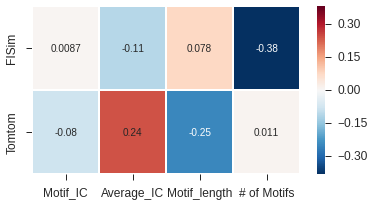

In [130]:
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})
fig, ax1 = plt.subplots(figsize=(6, 3))
sns.heatmap(fisim_tomtom, annot=True, ax=ax1)
plt.savefig("/home/kipkurui/Dropbox/PHD/Documents/NAR_Paper/Working_draft/Figs/tomtom_fisim_corr_heatmap-sm.pdf", bbox_inches='tight')

In [45]:
d = pd.DataFrame()
fisim_mean = pd.DataFrame()
#tf_list = "cebpb ctcf egr1 elf1 esrra ets1 gata3 hnf4a mafk max mef2a nrf1 pax5 pou2f2 prdm1 sp1 srf tcf3".split()
for tf_id in over_10:
    results_path = "/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/FisimTomtom/%s" % tf_id
    tomtom_sum = pd.read_table("%s/%s_fisim_ic.txt" % (results_path, tf_id))
    a = tomtom_sum.corr()
    
    asd = pd.Series([len(tomtom_sum)],index=["Number"]).to_frame(pbmchip2name[tf_id])
    means = tomtom_sum.mean().to_frame(name=pbmchip2name[tf_id])
    means = means.append(asd)
    
    fisim_mean = fisim_mean.append(means.T)
    
    b = a['Average'].to_frame(name=pbmchip2name[tf_id])
    d = d.append(b.T)
fisim = d.drop("Average", axis=1)
fisim_mean.corr()

,Motif_IC,Average_IC,Motif_length,Average,Number
Motif_IC,1.000000,0.398985,0.717571,0.008705,0.133370
Average_IC,0.398985,1.000000,-0.303600,-0.108936,0.204698
Motif_length,0.717571,-0.303600,1.000000,0.078293,-0.011399
Average,0.008705,-0.108936,0.078293,1.000000,-0.380942
Number,0.133370,0.204698,-0.011399,-0.380942,1.000000


In [18]:
fisim_cor = fisim_mean.corr()

In [47]:
fisim_mean.describe()

,Motif_IC,Average_IC,Motif_length,Average,Number
count,127.000000,127.000000,127.000000,127.000000,127.000000
mean,13.928249,1.156795,12.501421,0.746879,17.425197
std,2.223209,0.126061,1.860694,0.049653,8.099108
min,7.875346,0.652179,9.153846,0.643079,10.000000
25%,12.429462,1.081212,11.000000,0.714371,11.000000
50%,13.522035,1.168610,12.357143,0.735321,15.000000
75%,15.143041,1.244400,13.466403,0.776986,21.000000
max,20.617863,1.481927,18.916667,0.891034,47.000000


The main difference is the apparent influence of IC on the scores assigned by the two techniques. Tomtom scores have a positive correlation wih average IC (favour hiher IC motifs) while Fisim has a negative correlation (penalize higher IC motifs). Fism is not infleunced by length while Tomtom penalizes longer motifs. Surprisingly, number of motifs in the TF seem to negatively affect motif scores for Fism and not efect for Tomtom.

The question now is, what is the meaning of all this? How much of it can be explained by the design of the motif comparison tools in use here? Also, the number of motifs in a set, could bring in diversity. Therefore we should not read much from it. 

#### Repeat the above for FiSim

In [16]:
cols = "Average_IC"
#fisim[cols].to_frame(name="Fisim").T.append(tomtom[cols].to_frame(name="Tomtom").T)

compare = fisim[cols].to_frame(name="Fisim").T.append(tomtom[cols].to_frame(name="Tomtom").T).T

In [17]:
ranksums(compare['Fisim'],compare['Tomtom'])[1]

0.00012354354551824377

In [11]:
chip_det = open('/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/Data/passed_pbm_details.txt')
pbms = []
for line in chip_det:
    if line.startswith('Tf_id'):
        continue
    else:
        pbms.append(line.split()[0])

In [12]:
chip_det = open('/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/Data/Chip_details.txt')
chipseq = []
for line in chip_det:
    if line.startswith('Tf_id'):
        continue
    else:
        chipseq.append(line.split()[0])

In [24]:
print(os.path.isdir("/home/el"))

False


In [25]:
undone = []
for tf_id in chipseq:
    if os.path.isdir("/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/GimmeMars/%s/%s_discover"% (tf_id,tf_id)):
        continue
    else:
        undone.append(tf_id)

In [26]:
over10_pbm =[]
for tf in pbms:
    if tf in over_10:
        over10_pbm.append(tf)

In [131]:
over10_chip =[]
for tf in chipseq:
    if tf in over_10:
        over10_chip.append(tf)

### Plotting ChIP-seq data

In [137]:
here = pd.DataFrame()
enerrgy_mean = pd.DataFrame()
pbm_energy = pd.DataFrame()
tomtom_mean = pd.DataFrame()
fisim_mean = pd.DataFrame()
stat = "AUC"
chip_labels = []
for tf_id in over10_chip:
    tf_name = pbmchip2name[tf_id]
    chip_labels.append(tf_classdisct[tf_id[:3]])
    #tf_name = tf_id
    energy = pd.read_table("/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/ChIP-seq/Results/%s/%s.energy" % (tf_id,tf_id), index_col="Motif")
    #pbms = pd.read_table("/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/PBM/Results/%s/%s.energy" %s (tf_id, tf_id))
    a = energy[[stat]]
    e_mean = energy.mean().to_frame(name=tf_name)
    enerrgy_mean = enerrgy_mean.append(e_mean.T)
    
    
    results_path = "/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/FisimTomtom/%s" % tf_id
    tomtom_sum = pd.read_table("%s/%s_fisim_ic.txt" % (results_path, tf_id),index_col="Motif_name")

    tomtom_sum.index.names = ["Motif"]

    b = tomtom_sum["Average"].to_frame(name="Fisim")

    fisim_mean = fisim_mean.append(b.mean().to_frame(name=tf_name).T)


    # #results_path = "/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/FisimTomtom/%s" % tf_id
    tomtom_sum = pd.read_table("%s/%s_tomtom_ic.txt" % (results_path, tf_id), index_col="Motif_name")
    tomtom_sum.index.names = ["Motif"]
    c = tomtom_sum["Average"].to_frame(name="Tomtom")
    
    tomtom_mean = tomtom_mean.append(c.mean().to_frame(name=tf_name).T)

    d =a.T.append(b.T)

    total_cor = d.append(c.T).T.corr(method='pearson')
    #here = total_cor[stat].to_frame(name=pbmchip2name[tf_id])
    there = total_cor[stat].to_frame(name=tf_name)
    here = here.T.append(there.T).T

overall = here.T.drop(stat, axis=1)
overall_chip_unsorted = overall
overall_chip = overall.sort_values("Tomtom", ascending=False)
overall_chip.describe()

,Fisim,Tomtom
count,83.000000,83.000000
mean,0.646478,0.719150
std,0.318703,0.322177
min,-0.287187,-0.321046
25%,0.516138,0.626251
50%,0.781674,0.875551
75%,0.862488,0.928751
max,0.976314,0.975952


In [134]:
d = pd.DataFrame()
tomtom_mean = pd.DataFrame()
for tf_id in over10_chip:
    results_path = "/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/FisimTomtom/%s" % tf_id
    tomtom_sum = pd.read_table("%s/%s_tomtom_ic.txt" % (results_path, tf_id))
    a = tomtom_sum.corr()
    asd = pd.Series([len(tomtom_sum)],index=["Number"]).to_frame(pbmchip2name[tf_id])
    means = tomtom_sum.mean().to_frame(name=pbmchip2name[tf_id])
    means = means.append(asd)
    tomtom_mean = tomtom_mean.append(means.T)
    b = a['Average'].to_frame(name=pbmchip2name[tf_id])
    d = d.append(b.T)
tomtom = d.drop('Average', axis=1)
energy_stat = tomtom_mean
# fig, ax = plt.subplots()
# # the size of A4 paper
# fig.set_size_inches(10, 10)
# sns.heatmap(tomtom, annot=True, ax = ax)

In [140]:
enerrgy_mean = enerrgy_mean[["AUC"]]

,AUC
Cjun,0.698526
Jund,0.686909
Nfe2,0.684842
Nrf1,0.728545
Cfos,0.695750
Fosl1,0.616200
Fosl2,0.773900
Atf3,0.656000
Mafk,0.765353
Batf,0.692143


Given that the data are not normally distributted, it is inapproriate to use mean as a summary statistic. Rather, we use the Median. 

In [150]:
tets_this = energy_stat.T.append(enerrgy_mean[["AUC"]].T).T

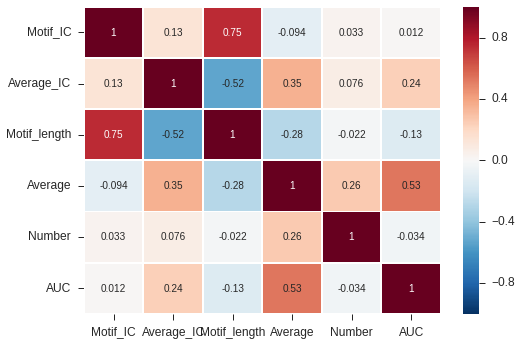

In [152]:
sns.heatmap(tets_this.corr(),annot=True)

### Plotting Pbm Data

In [32]:
here = pd.DataFrame()
enerrgy_mean = pd.DataFrame()
pbm_energy = pd.DataFrame()
tomtom_mean = pd.DataFrame()
fisim_mean = pd.DataFrame()
stat = "AUC"

for tf_id in over10_pbm:
    #tf_name = pbmchip2name[tf_id]
    tf_name = tf_id
    #energy_chip = pd.read_table("/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/ChIP-seq/Results/%s/%s.energy" % (tf_id,tf_id), index_col="Motif")
    energy = pd.read_table("/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/PBM/Results/%s/%s.energy" % (tf_id, tf_id), index_col="Motif")
    a = energy[[stat]]
    e_mean = energy.mean().to_frame(name=tf_name)
    enerrgy_mean = enerrgy_mean.append(e_mean.T)
    
    
    results_path = "/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/FisimTomtom/%s" % tf_id
    tomtom_sum = pd.read_table("%s/%s_fisim_ic.txt" % (results_path, tf_id),index_col="Motif_name")

    tomtom_sum.index.names = ["Motif"]

    b = tomtom_sum["Average"].to_frame(name="Fisim")

    fisim_mean = fisim_mean.append(b.mean().to_frame(name=tf_name).T)


    # #results_path = "/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/FisimTomtom/%s" % tf_id
    tomtom_sum = pd.read_table("%s/%s_tomtom_ic.txt" % (results_path, tf_id), index_col="Motif_name")
    tomtom_sum.index.names = ["Motif"]
    c = tomtom_sum["Average"].to_frame(name="Tomtom")
    
    tomtom_mean = tomtom_mean.append(c.mean().to_frame(name=tf_name).T)

    d =a.T.append(b.T)

    total_cor = d.append(c.T).T.corr(method='pearson')
    #here = total_cor[stat].to_frame(name=pbmchip2name[tf_id])
    there = total_cor[stat].to_frame(name=tf_name)
    here = here.T.append(there.T).T

overall_pbm = here.T.drop(stat, axis=1)

overall_pbm = overall_pbm.sort_values("Fisim", ascending=False)

overall_pbm.describe()

,Fisim,Tomtom
count,60.000000,60.000000
mean,0.557141,0.517878
std,0.423042,0.438368
min,-0.660472,-0.600541
25%,0.375407,0.202895
50%,0.723422,0.732528
75%,0.842668,0.830417
max,0.960362,0.952384


The median scores show that FISm and Tomtom do not differe as much in correlation with PBM energy scores. Also, this performance is lower as compared with that of ChIP-seq data, showing that Consistency-based approach better reproduces *in vivo* binding behaviour compared  with *in vitro* binding. Reporting the Median should be accompanied by the interquartile range of the data. Mdn = 0.72 (IQR = 0.2-0.84)

In [365]:
import gimmemotifs

In [379]:
import gimmemotifs.core

/home/kipkurui/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [397]:
gimmemotifs.motif.Motif.pwm_scan()

TypeError: unbound method pwm_scan() must be called with Motif instance as first argument (got nothing instead)

In [33]:
in_both = []
for tf in over10_pbm:
    if tf in over10_chip:
        in_both.append(tf)

### A dictionary of TF classification based on TF_ID

In [29]:
tf_classdisct = {}
with open("/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/Data/tf_class") as tcf:
    for line in tcf:
        tf_classdisct[line.split()[0]] = line.split()[1]
        

In [154]:
# here = pd.DataFrame()
# enerrgy_mean = pd.DataFrame()
# pbm_energy = pd.DataFrame()
# tomtom_mean = pd.DataFrame()
# fisim_mean = pd.DataFrame()
pbm_chip_corr = pd.DataFrame()
stat = "AUC"

for tf_id in in_both:
    #tf_class.append(tf_classdisct[tf_id[:3]])
    #tf_name = pbmchip2name[tf_id]
    tf_name = tf_id
    energy_chip = pd.read_table("/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/ChIP-seq/Results/%s/%s.energy" % (tf_id,tf_id), index_col="Motif")
    
    energy = pd.read_table("/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/PBM/Results/%s/%s.energy" % (tf_id, tf_id), index_col="Motif")
    
    a = energy[[stat]]
    chip_e = energy_chip[[stat]]
    
    
    d = chip_e.corrwith(a)
    d = d.to_frame(name=tf_name)
    
    pbm_chip_corr = pbm_chip_corr.append(d.T)
    
    
    
#     e_mean = energy.mean().to_frame(name=tf_name)
#     enerrgy_mean = enerrgy_mean.append(e_mean.T)
    
    
#     results_path = "/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/FisimTomtom/%s" % tf_id
#     tomtom_sum = pd.read_table("%s/%s_fisim_ic.txt" % (results_path, tf_id),index_col="Motif_name")

#     tomtom_sum.index.names = ["Motif"]

#     b = tomtom_sum["Average"].to_frame(name="Fisim")

#     fisim_mean = fisim_mean.append(b.mean().to_frame(name=tf_name).T)


#     # #results_path = "/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/FisimTomtom/%s" % tf_id
#     tomtom_sum = pd.read_table("%s/%s_tomtom_ic.txt" % (results_path, tf_id), index_col="Motif_name")
#     tomtom_sum.index.names = ["Motif"]
#     c = tomtom_sum["Average"].to_frame(name="Tomtom")
    
#     tomtom_mean = tomtom_mean.append(c.mean().to_frame(name=tf_name).T)

#     d =a.T.append(b.T)

#     total_cor = d.append(c.T).T.corr(method='pearson')
#     #here = total_cor[stat].to_frame(name=pbmchip2name[tf_id])
#     there = total_cor[stat].to_frame(name=tf_name)
#     here = here.T.append(there.T).T

# overall = here.T.drop(stat, axis=1)

# overall = overall.sort_values("Tomtom", ascending=False)
# overall.describe()
# overall.median()

In [156]:

pbm_chip_corr.sort_values(by="AUC", inplace=True, ascending=False)

pbm_chip_labels = []
new_index = []

for tf_id in pbm_chip_corr.index:
    pbm_chip_labels.append(tf_classdisct[tf_id[:3]])
    new_index.append(pbmchip2name[tf_id])
pbm_chip_corr.index = new_index


In [157]:
pbm_chip_labels

['TryptophanCF',
 'bHLH',
 'bHLH',
 'bHSH',
 'TryptophanCF',
 'znfC2H2',
 'znfC2H2',
 'znfNRC4',
 'HMG',
 'znfNRC4',
 'znfNRC4',
 'TryptophanCF',
 'Forkhead',
 'HDF',
 'znfC4other',
 'znfNRC4',
 'TryptophanCF',
 'TBP',
 'ARID',
 'TryptophanCF',
 'znfC2H2']

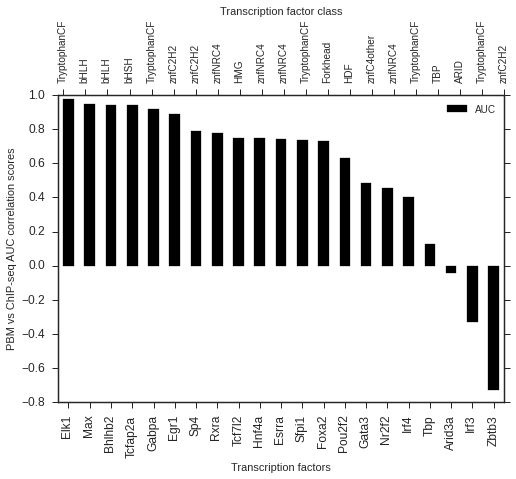

In [160]:
#May need to find a way of ensuring the figures are of an approriate size for ease in plotting. 
#pbm_chip_corr.sort_values(by="AUC", inplace=True, ascending=False)
sns.set_context("paper")
plt.figure(figsize=(8, 6))
sns.set(style="ticks")
ax = pbm_chip_corr.plot(kind="bar", cmap='Greys_r', fontsize=12)
ax.set_xlabel("Transcription factors")
ax.set_ylabel("PBM vs ChIP-seq AUC correlation scores")

#Uncomment below to add x-axis on top
# ax1 = ax.twiny()

# #ax1.set_xlim(ax1.get_xlim())

# ax1.set_xticks(np.array(range(1, len(pbm_chip_corr)+1))-0.75, minor=False)

# ax1.set_xticklabels(pbm_chip_labels, rotation= 'vertical')

# ax1.set_xlabel("Transcription factor class")

#sns.despine()
plt.savefig('/home/kipkurui/Dropbox/PHD/Documents/NAR_Paper/Working_draft/Figs/pbm_chip_correlation-ticks-black-tf_class.pdf', bbox_inches='tight')


We can see the same observation here as well. The ranks and scores of motifs that do not bind directly, or have a different binding behaviour in vitro, will generally not agree. Since they do not have a binding site, sequence based assessment, or any assessment for that matter, will not agree with any other.

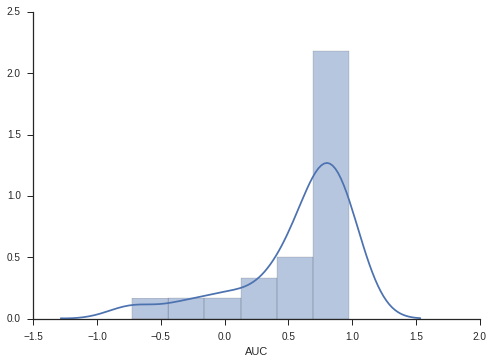

In [90]:
sns.distplot(pbm_chip_corr["AUC"])
sns.despine()

In [552]:
?sns.distplot(overall["Fisim"])

## Histogram and Scatter plot

The figure demonstrates the skew in the data and the reason why using mean would not be appropriate, but rather that we need to use Median score. Using Median, retains our analsysis that our approach is greatly coorrelated with the scores assigned by Energy score

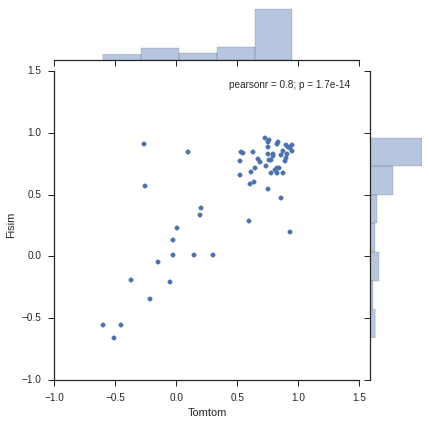

In [543]:
sns.set(style="ticks")
#sns.set_cmap(cmap='Greys_r')

sns.jointplot(x="Tomtom", y="Fisim", data=overall_pbm)
plt.set_cmap('Greys_r')
#plt.savefig('/home/kipkurui/Dropbox/PHD/Documents/Phd_Thesis/Chapter4/Figs/fisim_tomtom-jointplot-pbm.pdf', bbox_inches='tight')


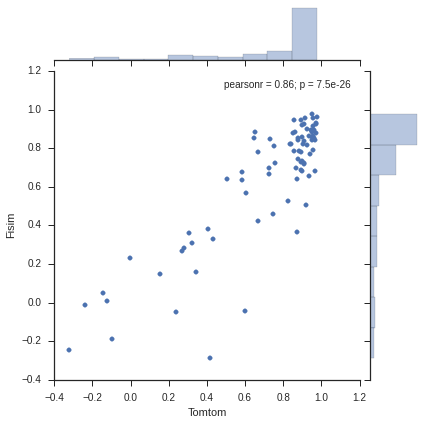

In [56]:
sns.set(style="ticks")
sns.jointplot(x="Tomtom", y="Fisim", data=overall_chip)
plt.savefig('/home/kipkurui/Dropbox/PHD/Documents/Phd_Thesis/Chapter4/Figs/fisim_tomtom-jointplot-chip.pdf', bbox_inches='tight')

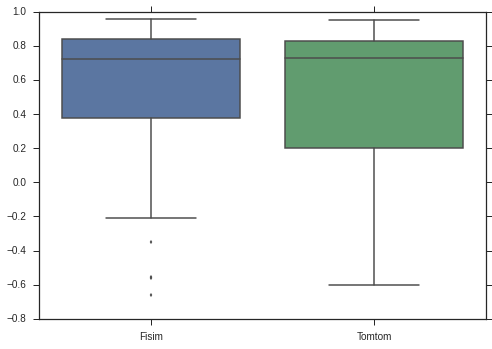

In [52]:
sns.boxplot(overall_pbm)
#sns.boxplot(overall_chip)
#plt.savefig('/home/kipkurui/Dropbox/PHD/Documents/Phd_Thesis/Chapter4/Figs/fisim_tomtom-boxplot.pdf', bbox_inches='tight')

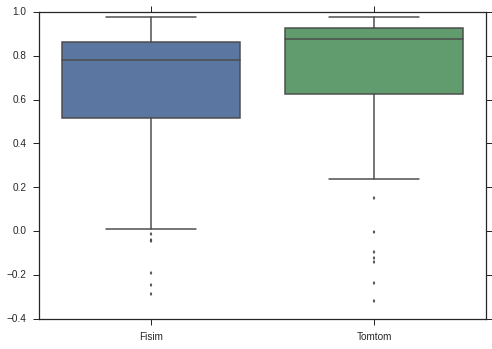

In [53]:
sns.boxplot(overall_chip)

It is clear that the correlation of the Tfs is greatly skewed by the bottom 10 motifs. 

In [57]:
combined_scores = tomtom_mean.sort_values("Tomtom", ascending=False).T.append(fisim_mean.T).append(enerrgy_mean["AUC"].to_frame().T).T

In [64]:
overal_sortindex = overall.sort_index()

### Plot ChIP-seq energy correlatin with the Consistency (Tomtom and FISim)

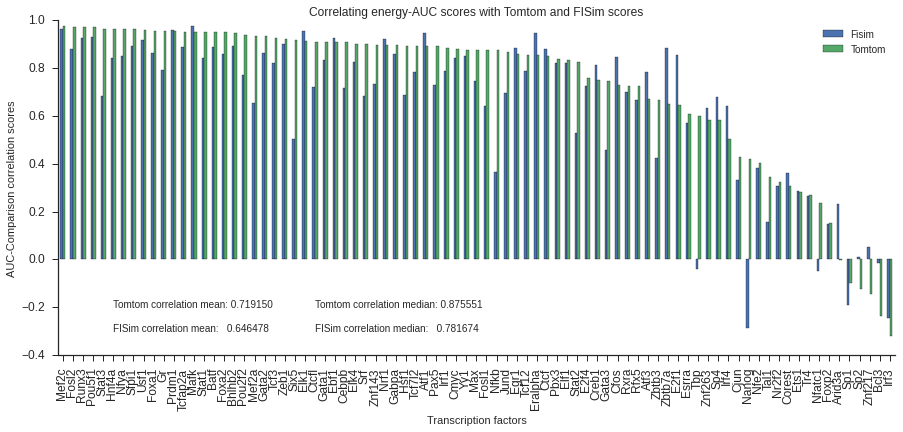

In [94]:
sns.set(style="ticks")
ax = overall_chip.plot(kind="bar", title="Correlating energy-AUC scores with Tomtom and FISim scores", figsize=(15,6), fontsize=12)
#plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
ax.set_xlabel("Transcription factors")
ax.set_ylabel("AUC-Comparison correlation scores")
ax.set_axis_on()

#Add a new x-axis on top of the figure
ax1 = ax.twiny()

#ax1.set_xlim(ax1.get_xlim())

ax1.set_xticks(np.array(range(len(overall_pbm))), minor=False)

ax1.set_xticklabels(pbm_labels, rotation= 'vertical')

ax1.set_xlabel("Transcription factor class")

#ax.grid(False)
#?ax.grid(linestyle='-')
#sns.despine()
#?ax.set_figure()
#ax.set_axis_bgcolor('W')
ax.annotate("Tomtom correlation mean: %f" % overall_chip.mean()["Tomtom"], (5,-0.20))
ax.annotate("Tomtom correlation median: %f" % overall_chip.median()["Tomtom"], (25,-0.20))

ax.annotate("FISim correlation mean:   %f" % overall_chip.mean()["Fisim"], (5,-0.30))


ax.annotate("FISim correlation median:   %f" % overall_chip.median()["Fisim"], (25,-0.30))

#ax.annotate("p-value (wilcoxon ranksum test):   %f" % ranksums(overall['Fisim'],overall['Tomtom'])[1], (5,-0.05))
fig = ax.get_figure()
#fig.savefig('/home/kipkurui/Dropbox/PHD/Documents/Phd_Thesis/Chapter4/Figs/fisim_tomtom_chip.pdf', bbox_inches='tight')

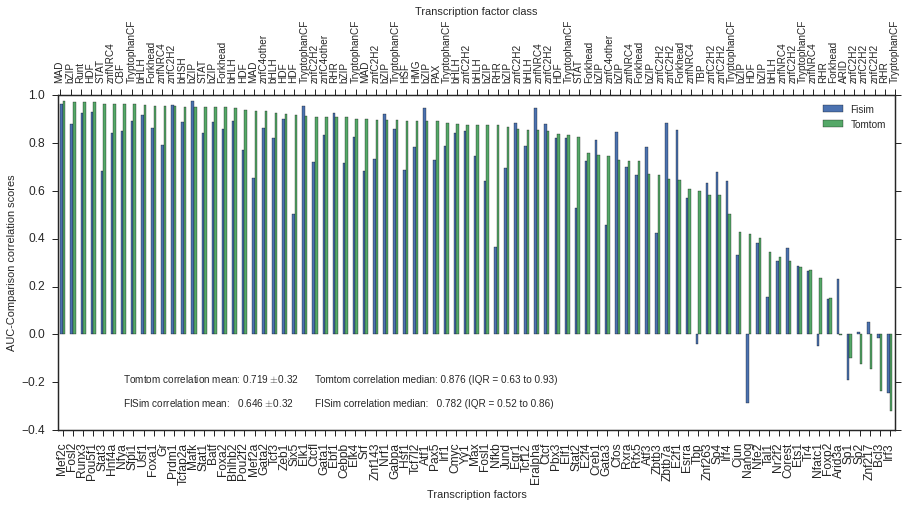

In [589]:
#overall_chip.sort_index(inplace=True)

# chip_labels = []
# new_index = []

# for tf_id in overall_chip.index:
#     chip_labels.append(tf_classdisct[tf_id[:3]])
#     new_index.append(pbmchip2name[tf_id])
# overall_chip.index = new_index

sns.set(style="ticks")
ax = overall_chip.plot(kind="bar", figsize=(15,6), fontsize=12)
#plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
ax.set_xlabel("Transcription factors")
ax.set_ylabel("AUC-Comparison correlation scores")
ax.set_axis_on()

#Add a new x-axis on top of the figure
ax1 = ax.twiny()

#ax1.set_xlim(ax1.get_xlim())

ax1.set_xticks(np.array(range(1, len(overall_chip)+1))-0.75, minor=False)

ax1.set_xticklabels(chip_labels, rotation= 'vertical')

ax1.set_xlabel("Transcription factor class")
#patches, labels = ax.get_legend_handles_labels()

#ax.legend(patches, labels, loc='lower right', frameon=True)

#ax.grid(False)
#?ax.grid(linestyle='-')
#sns.despine()
#?ax.set_figure()
#ax.set_axis_bgcolor('W')
ax.annotate("Tomtom correlation mean: %.3f$\pm$%.2f" % (overall_chip.mean()["Tomtom"], overall_chip.std()["Tomtom"]), (6,-0.20))
ax.annotate("Tomtom correlation median: %.3f (IQR = %.2f to %.2f)" % (overall_chip.median()["Tomtom"], overall_chip.quantile(.25)["Tomtom"], overall_chip.quantile(.75)["Tomtom"]), (25,-0.20))

ax.annotate("FISim correlation mean:   %.3f$\pm$%.2f" % (overall_chip.mean()["Fisim"], overall_chip.std()["Fisim"]), (6,-0.30))


ax.annotate("FISim correlation median:   %.3f (IQR = %.2f to %.2f)" % (overall_chip.median()["Fisim"], overall_chip.quantile(.25)["Fisim"], overall_chip.quantile(.75)["Fisim"]), (25,-0.30))

#ax.annotate("p-value (wilcoxon ranksum test):   %f" % ranksums(overall['Fisim'],overall['Tomtom'])[1], (5,-0.05))
fig = ax.get_figure()
fig.savefig('/home/kipkurui/Dropbox/PHD/Documents/NAR_Paper/Working_draft/Figs/fisim_tomtom_chip_tfclass_sorted.pdf', bbox_inches='tight')

In [38]:
overall_chip.quantile(.25)["Tomtom"]

0.62625097095512805

## Plot PBM energy correlatin with the Consistency (Tomtom and FISim)

#### Normal plot

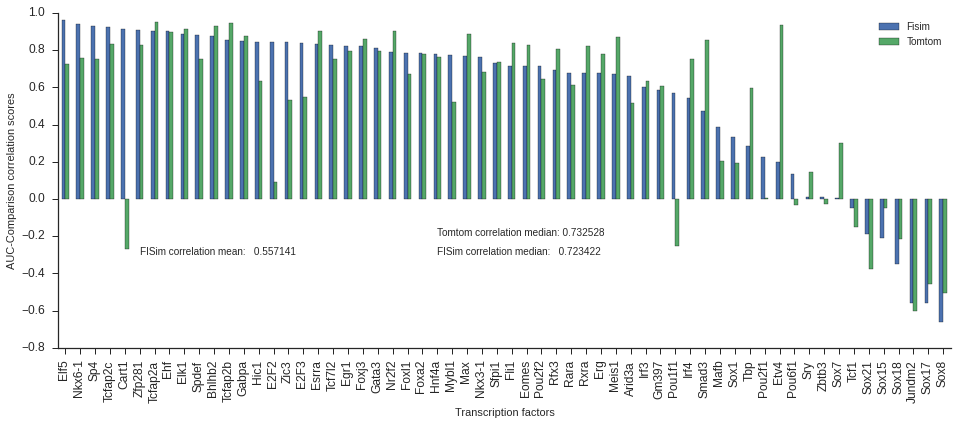

In [627]:
#overall_pbm.sort_index(inplace=True)
#overall_pbm.sort_values(by="Fisim", inplace=True, ascending=False)
sns.set(style="ticks")
ax = overall_pbm.plot(kind="bar", figsize=(16,6), fontsize=12)
#plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
ax.set_xlabel("Transcription factors")
ax.set_ylabel("AUC-Comparison correlation scores")

#ax.set_xlabel('X LABEL')    
#ax.xaxis.set_label_position('top') 
ax.set_axis_on()

#ax.xaxis.tick_top()

#ax.xaxis.tick_bottom()
#ax.invert_yaxis()
ax.xaxis.tick_top()
ax.grid(False)
#?ax.grid(linestyle='-')
sns.despine()
#?ax.set_figure()
#ax.set_axis_bgcolor('W')
ax.annotate("Tomtom correlation mean: %f" % overall_pbm.mean()["Tomtom"], (5,-0.20))
ax.annotate("Tomtom correlation median: %f" % overall_pbm.median()["Tomtom"], (25,-0.20))

ax.annotate("FISim correlation mean:   %f" % overall_pbm.mean()["Fisim"], (5,-0.30))


ax.annotate("FISim correlation median:   %f" % overall_pbm.median()["Fisim"], (25,-0.30))

#ax.annotate("p-value (wilcoxon ranksum test):   %f" % ranksums(overall['Fisim'],overall['Tomtom'])[1], (5,-0.05))
fig = ax.get_figure()
#fig.savefig('/home/kipkurui/Dropbox/PHD/Documents/Phd_Thesis/Chapter4/Figs/fisim_tomtom_pbm_corr.pdf', bbox_inches='tight')

A few observations can be made from this:a) The Low scores are due to Tfs which do not depict direct binding hence using sequence data for assessment do not work. The figure seems to depict that the FISim is better at predicting oin vitro binding (based on mean) than Tomtom. Interestingly also is that the motifs belong to the same TF class (HMG) have negative correlation with the PBM binding. If we assume, consistency based aproach captures the in vivo binding, it so seems then that the motifs have a different binding behaviour in vivo and in vitro. 

#### Add another x-axis on top

In [348]:
overall_pbm = overall_pbm2

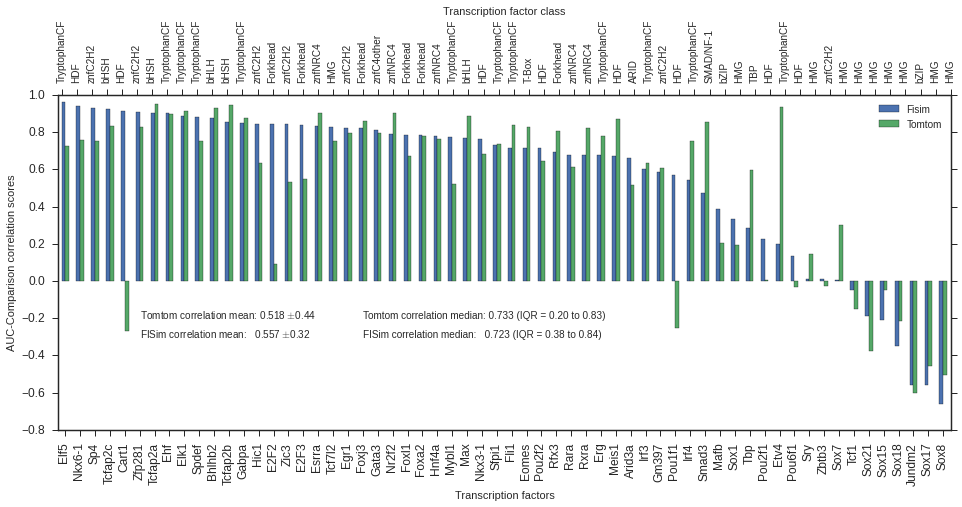

In [566]:
#Uncomment below to get the figure legends
# overall_pbm.sort_values(by="Fisim",ascending=False, inplace=True)
# pbm_labels = []
# new_index = []
# for tf_id in overall_pbm.index:
#     pbm_labels.append(tf_classdisct[tf_id[:3]])
#     new_index.append(pbmchip2name[tf_id])
# overall_pbm.index = new_index

sns.set(style="ticks")

ax = overall_pbm.plot(kind="bar", figsize=(16,6), fontsize=12)

#Add a new x-axis on top of the figure
ax1 = ax.twiny()

#ax1.set_xlim(ax1.get_xlim())

ax1.set_xticks(np.array(range(1,len(overall_pbm)+1))-0.75, minor=False)

ax1.set_xticklabels(pbm_labels, rotation= 'vertical')

ax1.set_xlabel("Transcription factor class")


ax.set_xlabel("Transcription factors")
ax.set_ylabel("AUC-Comparison correlation scores")


ax.set_axis_on()


# ax.annotate("Tomtom correlation mean: %f" % overall_pbm.mean()["Tomtom"], (5,-0.20))
# ax.annotate("Tomtom correlation median: %f" % overall_pbm.median()["Tomtom"], (25,-0.20))

# ax.annotate("FISim correlation mean:   %f" % overall_pbm.mean()["Fisim"], (5,-0.30))

# ax.annotate("FISim correlation median:   %f" % overall_pbm.median()["Fisim"], (25,-0.30))

ax.annotate("Tomtom correlation mean: %.3f$\pm$%.2f" % (overall_pbm.mean()["Tomtom"], overall_pbm.std()["Tomtom"]), (5,-0.20))
ax.annotate("Tomtom correlation median: %.3f (IQR = %.2f to %.2f)" % (overall_pbm.median()["Tomtom"], overall_pbm.quantile(.25)["Tomtom"], overall_pbm.quantile(.75)["Tomtom"]), (20,-0.20))

ax.annotate("FISim correlation mean:   %.3f$\pm$%.2f" % (overall_pbm.mean()["Fisim"], overall_chip.std()["Fisim"]), (5,-0.30))


ax.annotate("FISim correlation median:   %.3f (IQR = %.2f to %.2f)" % (overall_pbm.median()["Fisim"], overall_pbm.quantile(.25)["Fisim"], overall_pbm.quantile(.75)["Fisim"]), (20,-0.30))


fig = ax.get_figure()

fig.savefig('/home/kipkurui/Dropbox/PHD/Documents/NAR_Paper/Working_draft/Figs/fisim_tomtom_pbm_corr_tfclass.pdf', bbox_inches='tight')

In [244]:
asd = ax.get_axes()

In [249]:
df = asd.get_xticklabels()

## Run Gimme Analsysis

In [52]:
overall_index = overall.sort_values(by="Tomtom", ascending=False)

In [56]:
bottom_10 = overall_index.tail(10).index

In [57]:
bottom_10

Index([u'3.5.2.1.1', u'2.1.3.4.2', u'6.1.3.0.1', u'3.3.1.16.2', u'3.7.1.3.1',
       u'2.3.1.1.1', u'2.3.1.1.2', u'2.3.4.2.4', u'6.1.2.1.8', u'3.5.3.0.3'],
      dtype='object')

In [38]:
overall_index_names  = overall_index = overall_index.index

In [46]:
a = overall_index_names[:10]

In [13]:
def tab2fasta(posneg, fasta, background):
    i = 0
    #print fasta
    with open(posneg) as tab:
        with open(fasta, 'w') as fa:
            with open(background, 'w') as bg:
                for line in tab:
                    details = line.split()
                    if len(details) == 2:
                        pos = 1
                    else:
                        pos = 2
                    if i < 500:
                        fa.write(">"+line.split()[0]+'\n'+line.split()[pos]+"\n")
                    else:
                        bg.write(">"+line.split()[0]+'\n'+line.split()[pos]+"\n")
                    i += 1

def meme2gimme(meme, gimme):
    with open(meme) as motif:
        with open(gimme, 'w') as gmotif:
            for line in motif:
                if line.startswith("MOTIF"):
                    if len(line.split(" ")) > 2:
                        gmotif.write(">"+line.split(" ")[1]+"\n")
                    else:
                        gmotif.write(">"+line.split(" ")[1])
                elif line.startswith('letter-probability'):
                    continue
                elif line.startswith('  '):
                    a = line.split()
                    if len(a)>0:
                        gmotif.write(a[0]+'\t'+a[1]+'\t'+a[2]+'\t'+a[3]+'\n')
                    else:
                        continue
                elif line.startswith("\n"):
                    continue
                else:
                    continue

def run_gimme(tf_id):
    import os
    import glob
    meme_path = "/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/Motifs/%s.meme" % tf_id
    posneg_path = "/home/kipkurui/Project/MAT_server/Data/ChIP-seq/Derived/Posneg"
    chip_seq_list = glob.glob('%s/%s/*' % (posneg_path, chipid2name[tf_id]))
    results_path = "/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/GimmeRoc/%s" % tf_id
    #mkdir_p(results_path)
    if os.path.isdir(results_path):
        pass
    else:
        os.makedirs(results_path)
    
    #run_all(tf_id,'energyscore',meme_path,chip_seq_list,results_path)
    #files_path = '%s/%s' % (results_path, tf_id)
    pwm = '%s/%s.pwm' % (results_path, tf_id)
    meme2gimme(meme_path, pwm)
    
    for chip_seq in chip_seq_list:
        file_name = chip_seq.split('/')[-1].split('.')[0]
        
        Tf_path = '%s/%s' % (results_path, file_name)
        
        tab2fasta(chip_seq, "%s.fa" % Tf_path, '%s.bg' % Tf_path)
    
        
        !gimme roc {pwm} {Tf_path}.fa {Tf_path}.bg >>{results_path}/{tf_id}_gimme_metrics.txt
        
        #os.system("gimme roc %s/%s.pwm %s/%s.fa %s/%s.bg >>%s/%s_gimme_metrics.txt" %
#                   #(files_path, tf, files_path, file_name, files_path, file_name, files_path, tf))
    for i in glob.glob('%s/*.bg' % results_path):
        os.remove(i)
    for i in glob.glob('%s/*.fa' % results_path):
        os.remove(i)

def clean_gimme(gimme_in, gimme_out):
    """
    Function that cleans the GIMME output for the purpose of plotting the data
    """
    with open(gimme_in) as gim:
        with open(gimme_out, 'w') as outs:
            outs.write("Motif	ROC AUC	MNCP	Max f-measure	Sens @ max f-measure\n")
            for line in gim:
                if line.startswith("Motif"):
                    continue
                else:
                    outs.write(line)

In [442]:
chipseq = []
chipid2name = {}
with open("/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/Data/Chip_details.txt") as chip_det:
    for line in chip_det:
        chipseq.append(line.split()[0])
        chipid2name[line.split()[0]] = line.split()[1]
# for tf_id in chipseq:
#     chipid2name[tf_id] = ChipSeq.objects.filter(tf_id=tf_id).all()[0].tf_name

for tf_id in ('2.3.3.0.6', '4.1.6.1.1', 'Tf_id'):
    chipseq.remove(tf_id)

In [86]:
done_list = []
with open("/home/kipkurui/done_motifs.txt") as dones:
    for line in dones:
        done_list.append(line.strip())

In [87]:
undone = []
for tf_id in chipseq:
    if tf_id in done_list:
        continue
    else:
        undone.append(tf_id)

In [7]:
tf_id = "1.1.1.1.1"
#meme_path = "/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/Motifs/1.1.1.1.1.meme"
run_gimme(tf_id)

In [8]:
import pandas as pd
import glob
for tf_id in chipid2name:
    results_path = "/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/GimmeRoc/%s" % tf_id
    if tf_id == "Tf_id":
        continue
    elif os.path.isdir(results_path):
        continue
    else:
        
        run_gimme(tf_id)
        #results_path = "/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/GimmeRoc/%s" % tf_id
        gimme_in = "%s/%s_gimme_metrics.txt" % (results_path, tf_id)
        gimme_out = "%s/%s.gimme" % (results_path, tf_id)

        clean_gimme(gimme_in, gimme_out)

        gimme = pd.read_table(gimme_out)
        new_gimme = pd.pivot_table(gimme, index=['Motif'])
        new_gimme = new_gimme.sort_values(by="ROC AUC", axis=0, ascending=False)
        labels = new_gimme.index
        new_gimme.to_csv(gimme_out,sep="\t")



### Motif discovwery with GIMME

In [68]:
for tf_id in removed:
    results_path = "/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/GimmeMars/%s" % tf_id
    if tf_id == "Tf_id":
        continue
    else:
        !gimme motifs {results_path}/{tf_id}_discover.fa -k -t MDmodule,MEME,MotifSampler,trawler,Improbizer,BioProspector,Posmo,ChIPMunk,AMD,HMS,Homer -n {results_path}/{tf_id}_discover
    

IndentationError: expected an indented block (<ipython-input-68-0b7629280884>, line 7)

## Run complete clustering of the motifs discovered by GimmeMotifs

In order to us Tomtom ranking, the motifs are first clustred in thta, when predicting motifs, the best three located in different clusters can be extracted. 

In [69]:
for tf_id in removed:
    results_path = "/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/GimmeMars/%s" % tf_id
    if tf_id == "Tf_id":
        continue
    else:
        pfm_in = "%s/%s_discover_all_motifs.pfm" % (results_path, tf_id)
        out_folder = "%s/%s_discover_cluster" % (results_path,tf_id)
        if os.path.isdir(out_folder):
            continue
        else:
            !gimme cluster {pfm_in} {out_folder}

IndentationError: expected an indented block (<ipython-input-69-541c738d1692>, line 11)

## Motif ranking using Tomtom and clustering

In [174]:
chipseq.append(removed)

In [176]:
chipseq.remove(removed)

In [168]:
for tf_id in removed:
    #Motif-ranking-using-Tomtom-and-clustering
    #results_path = "/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/GimmeMars/%s" % tf_id
    if tf_id == "Tf_id":
        continue
    else:
        print(tf_id)
        results_path = "/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/GimmeMars/%s" % tf_id
        pfm_all = "%s/%s_discover_all_motifs.pfm" % (results_path, tf_id)
        meme_all = "%s/%s_discover_all_motifs.meme" % (results_path, tf_id)
        tomtom_raw = "%s/%s.tomtom_raw.txt" % (results_path, tf_id)
        gimmepfm2meme(pfm_all,meme_all)
        run_tomtom(tf_id, meme_all,results_path)

1.1.1.1.1
1.1.2.1.1
1.1.1.2.2
2.3.2.1.12
3.1.10.5.1
3.7.1.4.2
4.1.6.1.1
6.1.1.2.1
6.2.1.0.5
7.1.2.0.3
2.3.3.0.6


/home/kipkurui/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:35: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/kipkurui/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:42: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/kipkurui/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:58: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [40]:
#meme_all = "%s/%s_discover/intermediate_results/%s_discover_all_motifs.meme" % (Tf_path,tf,tf)

#tomtom_raw = "%s/%s_discover/intermediate_results/%s_discover_all_motifs.tomtom.raw" % (Tf_path,tf,tf)

/home/kipkurui/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:37: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/kipkurui/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:44: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/kipkurui/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:60: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


### Get bed file from the fasta sequencs names

Using this script to get the bed files from teh fasta sequences I had identified as test set. OI am using this for the purpose of getting the negative matched genomic sequences

I had to use the negative background sequences located downstream of the original binidng site

In [31]:
def extract_negative(bed_in, bed_out, downstream_distance):
    """
    Extract bed file coordinates of the negative sequences
    """
    with open(bed_in) as bed:
        with open(bed_out, "w") as neg_fa:
            for line in bed:
                spl = line.split()
                write_details = "%s\t%i\t%i\n" % (spl[0], int(spl[1])+int(downstream_distance),
                                       int(spl[2])+int(downstream_distance))
                neg_fa.write(write_details)

In [ ]:
# for tf_id in chipid2name:
    if tf_id == "Tf_id":
        continue
    else:
        results_path = "/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/GimmeMars/%s" % tf_id
#         !grep ">" {results_path}/{tf_id}_test.fa |sed 's/>//' |sed 's/:/\t/' |sed 's/-/\t/' >{results_path}/{tf_id}_test.bed
#         bed_in = "%s/%s_test.bed" % (results_path, tf_id)
#         bed_out = "%s/%s_bg.bed" % (results_path, tf_id)
#         extract_negative(bed_in, bed_out, 500)
        
        !fastaFromBed -fi /home/kipkurui/Project/MAT_server/Data/hg19.fa -bed {results_path}/{tf_id}_bg.bed -fo {results_path}/{tf_id}_bg.fa

In [52]:
#for tf_id in chipid2name:

results_path = "/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/GimmeMars/%s" % tf_id
# !grep ">" {results_path}/{tf_id}_test.fa |sed 's/>//' |sed 's/:/\t/' |sed 's/-/\t/' >{results_path}/{tf_id}_test.bed
# a = !wc -l {results_path}/{tf_id}_test.fa |cut -f1 -d" "
# number = int(a[0])/2
tf_id = "1.1.1.1.1"
!gimme background {results_path}/{tf_id}_bg.fa random_genomic -i {results_path}/{tf_id}_test.bed -l 100 -n {number}

## Extract the best from TOMTOM and GIMME into one file

In [32]:
tf_id = "1.1.1.1.1"

In [36]:
for tf_id in chipseq:
    if tf_id == "Tf_id":
        continue
    else:
        results_path = "/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/GimmeMars/%s" % tf_id
        tomtom_raw = "%s/%s.tomtom_raw.txt" % (results_path, tf_id)

        !python /home/kipkurui/Project/MAT_server/MARST_Suite/FISIM/kcmeans.py -fileIn {tomtom_raw} -o {results_path}/{tf_id}_cluster.txt -k 20        

[[ 1.01202265 +2.57013900e-19j  0.96628414 +4.66401006e-19j
   0.92217145 +8.02432043e-21j ..., -0.02103943 +8.15867635e-20j
  -0.07844079 +1.04841578e-18j -0.02063845 -1.42245377e-18j]
 [ 0.96628414 +1.52065471e-18j  0.97590446 +3.26565193e-19j
   0.91749032 -3.60990875e-19j ..., -0.00937792 +6.90613066e-19j
  -0.06287998 +6.43823514e-19j -0.02445805 -6.11877679e-19j]
 [ 0.92217145 +1.56873854e-20j  0.91749032 +2.97770608e-19j
   1.05838317 -5.30993644e-20j ...,  0.00726983 +1.16285480e-19j
   0.00609287 +2.41001674e-19j -0.00782438 +1.78658519e-21j]
 ..., 
 [-0.02103943 +2.95329904e-19j -0.00937792 -2.54209054e-19j
   0.00726983 +1.07676146e-20j ...,  0.18428346 -1.26970738e-19j
   0.11433625 +4.20449467e-19j  0.19022164 -4.16735778e-19j]
 [-0.07844079 -5.68476528e-19j -0.06287998 -9.38460595e-19j
   0.00609287 +1.36280825e-20j ...,  0.11433625 -8.48755844e-19j
   0.21841152 -1.66977345e-18j  0.09516148 -2.84663674e-19j]
 [-0.02063845 -1.68194275e-18j -0.02445805 -2.59299547e-20j
  -

In [18]:
def get_top_from_fisim(cluster_key, yylist, get_no):
    with open(cluster_key) as cluster:
        all_clusters = cluster.readlines()
    mot_lits = []
    for mot in yylist:
        for i in all_clusters:
            new_list = i.split()
            if mot in new_list:
                mot_lits.append(mot)
                all_clusters.remove(i)
    discover_three = mot_lits[:get_no]

    return discover_three

def get_top_from_gimme(cluster_key, yylist):
    with open(cluster_key) as cluster:
        all_clusters = cluster.readlines()
    mot_lits = []
    for mot in yylist:
        for i in all_clusters:
            new_list = i.split()[1].split(',')
            if mot in new_list:
                mot_lits.append(mot)
                all_clusters.remove(i)
    discover_three = mot_lits[:get_no]

    return discover_three

In [20]:
for tf_id in chipseq:
    if tf_id == "Tf_id":
        continue
    else:

        results_path = "/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/GimmeMars/%s" % tf_id
        tomtom_raw = "%s/%s.tomtom_raw.txt" % (results_path, tf_id)
        yylist = !cut -f1 {tomtom_raw}
        
#         cluster_key = "%s/%s_discover_cluster/cluster_key.txt" % (results_path, tf_id)
#         prefix = "gimme_top3"
#         discover_three = get_top_from_gimme(cluster_key, yylist)
        
        cluster_key = "%s/%s_cluster.txt" % (results_path, tf_id)
        prefix = "fisim_top3"        
        discover_three = get_top_from_fisim(cluster_key, yylist)
        


        pfm_all = "%s/%s_discover_all_motifs.pfm" % (results_path, tf_id)
        pfm_gimme = '%s/%s_discover_motifs.pwm' % (results_path,tf_id)

        discover_best = "%s/%s_discover_best.pwm" % (results_path,tf_id)
        extract_pfm(pfm_all,discover_best,discover_three)


        gimme_len = !wc -l {results_path}/{tf_id}_discover_motif_report.tsv |cut -f1 -d" "

        if int(gimme_len[0])-1 <3:
            #n = int(gimme_len[0])-1
            n=1
        else:
            n = 1
        gimme_three = ! cut -f1 {results_path}/{tf_id}_discover_motif_report.tsv |head -2 |tail -{n}
        gimme_out = '%s/%s_gimme_best.pwm' % (results_path,tf_id)
        extract_pfm(pfm_gimme,gimme_out,gimme_three)

        !cat {results_path}/{tf_id}_gimme_best.pwm {results_path}/{tf_id}_discover_best.pwm >{results_path}/{tf_id}_combined_best.pwm

        #print(chipid2name[tf_id])

        !gimme roc {results_path}/{tf_id}_combined_best.pwm {results_path}/{tf_id}_test.fa {results_path}/{tf_id}_bg.fa >{results_path}/{tf_id}_roc-{prefix}.tcx

### Compare the perfomance of fisim and gimme clustering for motif choice

In [412]:
tf_id = "1.1.1.1.1"

In [463]:
#all_scores_fisim = []
sizes_gimme = []
for tf_id in chipseq:
    results_path = "/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/GimmeMars/%s" % tf_id
    prefix = "fisim_top3" 
    #wc -l {results_path}/{tf_id}_roc-{prefix}.tcx |cut -f1
    #cluster_key = "%s/%s_cluster.txt" % (results_path, tf_id)
    cluster_key = "%s/%s_discover_cluster/cluster_key.txt" % (results_path, tf_id)
    
    a = !wc -l {cluster_key} | cut -f1 -d" "
    sizes_gimme.append(int(a[0]))
    #res = "%s/%s_roc-%s.tcx" % (results_path, tf_id, prefix)
    #all_scores_fisim.append(pd.read_table(res)['ROC AUC'].mean())

In [465]:
np.mean(sizes)

15.881818181818181

In [450]:
np.mean(all_scores_fisim)

0.74337954545454554

In [445]:
all_scores_gimme = []
for tf_id in chipseq:
    results_path = "/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/GimmeMars/%s" % tf_id
    prefix = "gimme_top3" 
    res = "%s/%s_roc-%s.tcx" % (results_path, tf_id, prefix)
    all_scores_gimme.append(pd.read_table(res)['ROC AUC'].mean())

In [449]:
np.mean(all_scores_gimme)

0.71444621212121218

This quick and dirty approach actually tells us that the clustering by Fisim, or rather teh cut-off used generates motifs of  ahigher quality. The next question of coz would be, how big are the clusters? Interstingly the cluster sizes are bigger from gimme, meaning that highly similar ones are clustered closely

In [56]:
cluster_key = "%s/%s_cluster.txt" % (results_path, tf_id)
with open(cluster_key) as cluster:
    all_clusters = cluster.readlines()

In [ ]:
for tf_id in chipseq:
    if tf_id == "Tf_id":
        continue
    else:
        
        results_path = "/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/GimmeMars/%s" % tf_id
        tomtom_raw = "%s/%s.tomtom_raw.txt" % (results_path, tf_id)
        
#         cluster_key = "%s/%s_discover_cluster/cluster_key.txt" % (results_path, tf_id)
#         yylist = !cut -f1 {tomtom_raw}
#         with open(cluster_key) as cluster:
#             all_clusters = cluster.readlines()
#         mot_lits = []
#         for mot in yylist:
#             for i in all_clusters:
#                 new_list = i.split()[1].split(',')
#                 if mot in new_list:
#                     mot_lits.append(mot)
#                     all_clusters.remove(i)
#         discover_three = mot_lits[:1]
        #print(discover_three)
        pfm_all = "%s/%s_discover_all_motifs.pfm" % (results_path, tf_id)
        pfm_gimme = '%s/%s_discover_motifs.pwm' % (results_path,tf_id)

        discover_best = "%s/%s_discover_best.pwm" % (results_path,tf_id)
        extract_pfm(pfm_all,discover_best,discover_three)


        gimme_len = !wc -l {results_path}/{tf_id}_discover_motif_report.tsv |cut -f1 -d" "

        if int(gimme_len[0])-1 <3:
            #n = int(gimme_len[0])-1
            n=1
        else:
            n = 1
        gimme_three = ! cut -f1 {results_path}/{tf_id}_discover_motif_report.tsv |head -2 |tail -{n}
        gimme_out = '%s/%s_gimme_best.pwm' % (results_path,tf_id)
        extract_pfm(pfm_gimme,gimme_out,gimme_three)

        !cat {results_path}/{tf_id}_gimme_best.pwm {results_path}/{tf_id}_discover_best.pwm >{results_path}/{tf_id}_combined_best.pwm

        #print(chipid2name[tf_id])

        !gimme roc {results_path}/{tf_id}_combined_best.pwm {results_path}/{tf_id}_test.fa {results_path}/{tf_id}_bg.fa >{results_path}/{tf_id}_roc.tcx

In [717]:
mot_lits[:1]

['ChIPMunk_w7']

In [688]:
for tf_id in Compare_big_diff:
    if tf_id == "Tf_id":
        continue
    else:
        
        results_path = "/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/GimmeMars/%s" % tf_id
        tomtom_raw = "%s/%s.tomtom_raw.txt" % (results_path, tf_id)
        cluster_key = "%s/%s_discover_cluster/cluster_key.txt" % (results_path, tf_id)
        yylist = !cut -f1 {tomtom_raw}
        with open(cluster_key) as cluster:
            all_clusters = cluster.readlines()
        mot_lits = []
        for mot in yylist:
            for i in all_clusters:
                new_list = i.split()[1].split(',')
                if mot in new_list:
                    mot_lits.append(mot)
                    all_clusters.remove(i)
        discover_three = mot_lits[:1]
        #print(discover_three)
        pfm_all = "%s/%s_discover_all_motifs.pfm" % (results_path, tf_id)
        pfm_gimme = '%s/%s_discover_motifs.pwm' % (results_path,tf_id)

        discover_best = "%s/%s_discover_best.pwm" % (results_path,tf_id)
        extract_pfm(pfm_all,discover_best,discover_three)


        gimme_len = !wc -l {results_path}/{tf_id}_discover_motif_report.tsv |cut -f1 -d" "

        if int(gimme_len[0])-1 <3:
            #n = int(gimme_len[0])-1
            n=1
        else:
            n = 1
        gimme_three = ! cut -f1 {results_path}/{tf_id}_discover_motif_report.tsv |head -4 |tail -{n}
        gimme_out = '%s/%s_gimme_best.pwm' % (results_path,tf_id)
        extract_pfm(pfm_gimme,gimme_out,gimme_three)

        !cat {results_path}/{tf_id}_gimme_best.pwm {results_path}/{tf_id}_discover_best.pwm >{results_path}/{tf_id}_combined_best.pwm

        #print(chipid2name[tf_id])

        !gimme roc {results_path}/{tf_id}_combined_best.pwm {results_path}/{tf_id}_test.fa {results_path}/{tf_id}_bg.fa >{results_path}/{tf_id}_roc-third.tcx

In [160]:
removed = "1.1.1.1.1 1.1.2.1.1 1.1.1.2.2 2.3.2.1.12 3.1.10.5.1 3.7.1.4.2 4.1.6.1.1 6.1.1.2.1 6.2.1.0.5 7.1.2.0.3 2.3.3.0.6".split()

Remove the TFs that were not fully processed for motif discovery. This have been added into the analysis except for two. 

In [90]:
for tf_id in removed:
    chipseq.remove(tf_id)

### Prepare the Gimme and Tomtom motifs for plotting. 

The intention here is to compare the best motifs generated using Tomtom and those generated using Gimmes own rabnking system. 

In [45]:
remain = ['4.2.1.0.1',
 '4.2.1.0.2',
 '5.1.1.1.1',
 '5.1.1.1.3',
 '5.1.2.0.1',
 '6.1.1.2.1',
 '6.1.2.1.8',
 '6.1.3.0.1',
 '6.1.5.0.1',
 '6.2.1.0.1',
 '6.2.1.0.2',
 '6.2.1.0.3',
 '6.2.1.0.5',
 '6.4.1.0.3',
 '7.1.2.0.3',
 '8.1.1.0.1']

In [43]:
#4.1.6.1.1 2.3.3.0.6
chipseq.remove("2.3.3.0.6")

In [44]:
chipseq

['1.1.1.1.1',
 '1.1.1.1.2',
 '1.1.1.1.3',
 '1.1.1.2.1',
 '1.1.1.2.2',
 '1.1.1.2.5',
 '1.1.1.3.1',
 '1.1.2.1.1',
 '1.1.2.1.3',
 '1.1.2.1.4',
 '1.1.2.2.1',
 '1.1.3.2.1',
 '1.1.3.2.3',
 '1.1.4.0.1',
 '1.1.7.1.1',
 '1.1.7.1.2',
 '1.1.8.1.2',
 '1.1.8.1.4',
 '1.2.1.0.1',
 '1.2.1.0.3',
 '1.2.3.1.1',
 '1.2.4.1.12',
 '1.2.6.2.1',
 '1.2.6.2.2',
 '1.2.6.5.1',
 '1.2.6.5.5',
 '1.2.6.7.5',
 '1.3.1.0.1',
 '2.1.1.1.1',
 '2.1.1.2.1',
 '2.1.1.2.3',
 '2.1.3.1.1',
 '2.1.3.2.1',
 '2.1.3.2.2',
 '2.1.3.4.2',
 '2.1.3.5.2',
 '2.2.1.1.1',
 '2.2.1.1.2',
 '2.2.1.1.3',
 '2.2.1.2.7',
 '2.3.1.1.1',
 '2.3.1.1.2',
 '2.3.1.1.4',
 '2.3.1.3.1',
 '2.3.2.1.12',
 '2.3.3.0.79',
 '2.3.3.10.6',
 '2.3.3.12.1',
 '2.3.3.28.2',
 '2.3.3.50.1',
 '2.3.3.50.2',
 '2.3.3.8.1',
 '2.3.3.9.1',
 '2.3.4.0.27',
 '2.3.4.15.1',
 '2.3.4.2.4',
 '2.3.4.4.1',
 '2.3.4.8.1',
 '2.9.1.0.1',
 '3.1.10.2.2',
 '3.1.10.5.1',
 '3.1.2.12.1',
 '3.1.4.4.3',
 '3.1.6.3.2',
 '3.1.8.3.1',
 '3.2.2.2.2',
 '3.3.1.1.1',
 '3.3.1.1.2',
 '3.3.1.13.1',
 '3.3.1.16.2',
 '3.3

In [175]:
all_roc = pd.DataFrame()
for tf_id in chipseq:
    #print(tf_id,pbmchip2name[tf_id])
    results_path = "/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/GimmeMars/%s" % tf_id
    roc_code ="%s/%s_roc.tcx" % (results_path, tf_id)
    roc_data = pd.read_table(roc_code, index_col="Motif")
    keep = pd.read_table(roc_code, index_col="Motif")
    if 'GimmeMotifs' in keep.index[0]:
        g_i = 0
        c_i =1
    else:
        g_i = 1
        c_i = 0
    c = roc_data['ROC AUC'].to_frame(name=tf_id).T
    new_columns = c.columns.values; new_columns[g_i] = 'Gimme'; new_columns[c_i] = 'Compare'; c.columns = new_columns
    
    all_roc = all_roc.append(c)   
Gimme_all_roc = all_roc.sort_values(by="Compare", ascending=True)

Using this to change the location the position of teh chosen motif from teh Tomtom values

In [176]:
Gimme_all_roc

,Compare,Gimme
6.1.2.1.8,0.458,0.531
3.7.1.3.1,0.467,0.502
6.2.1.0.5,0.491,0.582
2.3.4.0.27,0.507,0.463
6.1.3.0.1,0.523,0.431
2.3.4.15.1,0.539,0.558
2.3.4.2.4,0.539,0.629
2.3.1.1.4,0.549,0.549
2.3.1.1.2,0.564,0.646
3.5.1.6.4,0.577,0.493


In [183]:
Compare_big_diff2 =[]
for index, row in Gimme_all_roc.iterrows():
    if row.Compare - (row.Gimme) >0.1:
        Compare_big_diff2.append(index)

In [184]:
Compare_big_diff2

['3.1.2.12.1',
 '2.3.4.4.1',
 '3.3.1.13.1',
 '6.2.1.0.1',
 '3.7.1.6.2',
 '8.1.1.0.1',
 '2.9.1.0.1',
 '2.3.3.0.79',
 '1.1.2.2.1',
 '2.3.3.8.1',
 '3.3.2.1.1']

In [185]:
labels2 = []
new_index = []

for tf_id in Compare_big_diff2:
    labels2.append(tf_classdisct[tf_id[:3]])
    #new_index.append(pbmchip2name[tf_id])
#pbm_chip_corr.index = new_index

In [182]:
labels

['bHSH', 'znfC2H2', 'Forkhead', 'bZIP', 'znfC2H2', 'TryptophanCF']

In [186]:
labels2

['HDF',
 'znfC2H2',
 'Forkhead',
 'STAT',
 'ARID',
 'TBP',
 'znfC2CH-THAP-type',
 'znfC2H2',
 'bZIP',
 'znfC2H2',
 'Forkhead']

In [689]:
check_roc = pd.DataFrame()
for tf_id in Compare_big_diff:
    results_path = "/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/GimmeMars/%s" % tf_id
    roc_code ="%s/%s_roc-third.tcx" % (results_path, tf_id)
    roc_data = pd.read_table(roc_code, index_col="Motif")
    #print(chipid2name[tf_id], roc_data)
    keep = pd.read_table(roc_code, index_col="Motif")
    if 'GimmeMotifs' in keep.index[0]:
        g_i = 0
        c_i =1
    else:
        g_i = 1
        c_i = 0
    c = roc_data['ROC AUC'].to_frame(name=pbmchip2name[tf_id]).T
    new_columns = c.columns.values; new_columns[g_i] = 'Gimme'; new_columns[c_i] = 'Compare'; c.columns = new_columns
    
    check_roc = check_roc.append(c)   
check_gimme3 = check_roc.sort_values(by="Compare", ascending=True)

In [180]:
Compare_big_diff2

['1.3.1.0.1', '2.3.4.8.1', '3.3.2.1.4', '1.1.7.1.2', '2.3.3.9.1', '3.5.3.0.3']

#### Adjust the colum names 

In [682]:
check_gimme1

,Compare,Gimme
Nanog,0.578,0.413
Ikzf1,0.592,0.469
Foxm1,0.624,0.493
Stat1,0.668,0.441
Plu1,0.674,0.485
Tbp,0.694,0.585
Thap1,0.710,0.552
Znf263,0.812,0.581
Atf3,0.814,0.638
Zbtb7a,0.836,0.289


In [685]:
check_gimme2

,Compare,Gimme
Nanog,0.578,0.724
Ikzf1,0.592,0.382
Foxm1,0.624,0.626
Stat1,0.668,0.480
Plu1,0.674,0.667
Tbp,0.694,0.563
Thap1,0.710,0.656
Znf263,0.812,0.556
Atf3,0.814,0.657
Zbtb7a,0.836,0.756


In [691]:
check_gimme3

,Compare,Gimme
Nanog,0.578,0.592
Ikzf1,0.592,0.382
Foxm1,0.624,0.523
Stat1,0.668,0.663
Plu1,0.674,0.667
Tbp,0.694,0.635
Thap1,0.710,0.761
Znf263,0.812,0.446
Atf3,0.814,0.697
Zbtb7a,0.836,0.813


In [693]:
check_gimme1.columns = ["Compare","Gimme1"]
check_gimme2.columns = ["Compare", "Gimme2"]
check_gimme3.columns = ["Compare","Gimme3" ]

In [696]:
# cols = check_gimme1.columns.tolist()
# cols = [cols[1]] + cols[:-1]
# check_gimme1 = check_gimme1[cols] 

In [697]:
check_gimme1

,Compare,Gimme1
Nanog,0.578,0.413
Ikzf1,0.592,0.469
Foxm1,0.624,0.493
Stat1,0.668,0.441
Plu1,0.674,0.485
Tbp,0.694,0.585
Thap1,0.710,0.552
Znf263,0.812,0.581
Atf3,0.814,0.638
Zbtb7a,0.836,0.289


In [698]:
Gimme_top3 = check_gimme1.reset_index().merge(check_gimme2, how="left").set_index('index')
Gimme_top3 = Gimme_top3.reset_index().merge(check_gimme3, how="left").set_index('index')
Gimme_top3 = Gimme_top3.sort_values(by="Compare") #This sorting was just doen to ensure teh lgened is properly placed
Gimme_top3.index.name = "Motifs"

In [700]:
Gimme_top3.to_csv("Gimme_top3.txt", sep="\t")

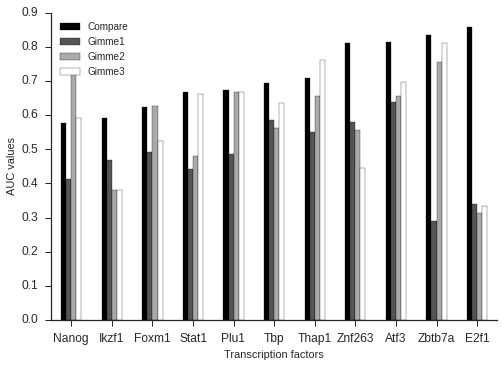

In [702]:
sns.set(style="ticks")
ax = Gimme_top3.plot(kind="bar", fontsize=12, rot=0,cmap='gray')
ax.set_xlabel("Transcription factors")
ax.set_ylabel("AUC values")
sns.despine()
plt.savefig('/home/kipkurui/Dropbox/PHD/Documents/NAR_Paper/Working_draft/Figs/Gimme_top3-greys.pdf', bbox_inches='tight')

In [509]:
all_roc.columns = ["Compare1","Gimme"]
check_second.columns = ["Compare2", "Gimme"]
check_third.columns = ["Compare3","Gimme" ]

In [516]:
 cols = all_roc.columns.tolist()

In [526]:
cols = [cols[1]] + cols[:-1]

In [527]:
all_roc2 = all_roc[cols]

In [528]:
all_roc2

,Gimme,Compare1
Ap2,0.857,0.600
Maz,0.785,0.658
E2f4,0.831,0.699
Atf1,0.936,0.721
Yy1,0.879,0.750
Irf3,0.925,0.822


#### Then Merge the data

In [529]:
new_merge = all_roc2.reset_index().merge(check_second, how="left").set_index('index')
new_merge = new_merge.reset_index().merge(check_third, how="left").set_index('index')
new_merge = new_merge.sort_values(by="Gimme") #This sorting was just doen to ensure teh lgened is properly placed
new_merge.index.name = "Motifs"

In [687]:
new_merge.to_csv("Consistency_top3_motifs.txt", sep="\t")

In [423]:
#This helps keep the figure legene in  a given location
# ax = new_merge.plot(kind='bar', legend=False)
# patches, labels = ax.get_legend_handles_labels()

# ax.legend(patches, labels, loc='upper center')


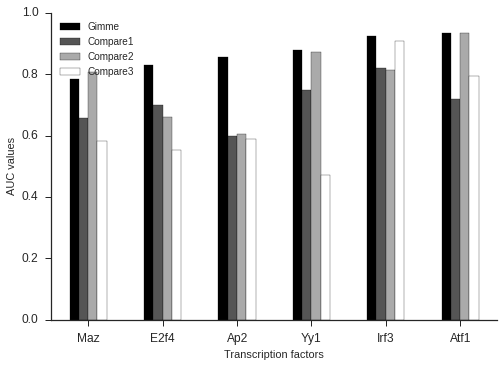

In [531]:
sns.set(style="ticks")
ax = new_merge.plot(kind="bar", fontsize=12, rot=0,cmap='gray')
ax.set_xlabel("Transcription factors")
ax.set_ylabel("AUC values")
sns.despine()
plt.savefig('/home/kipkurui/Dropbox/PHD/Documents/NAR_Paper/Working_draft/Figs/Consistency_top3-greys.pdf', bbox_inches='tight')

We observer some improvement in the peromance of the chosen motifs when the second best motif predicted by our approach is chosen. In these cases, we can argue that since a user would normally select more than one motif for comparison, we consider our approach validated as a useful tool for performing data independednt validation of the motifs predicted. This avoids any scoring bias that may arise, especially when the data were predicted from different algorithms. In choosing the third motif, the quality of Irf3 motif improved by close to 0.1. 

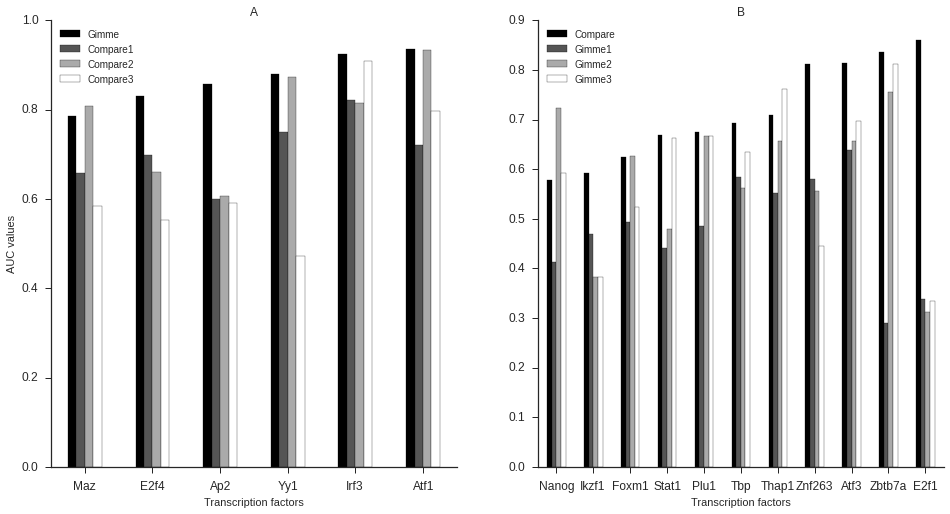

In [715]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(16, 8))
new_merge.plot(kind="bar", fontsize=12, rot=0,cmap='gray', ax=ax1)
Gimme_top3.plot(kind="bar", fontsize=12, rot=0,cmap='gray', ax=ax2)
ax1.set_xlabel("Transcription factors")
ax1.set_title("A")
ax2.set_xlabel("Transcription factors")

ax2.set_title("B")
ax1.set_ylabel("AUC values")
sns.despine()

plt.savefig('/home/kipkurui/Dropbox/PHD/Documents/NAR_Paper/Working_draft/Figs/Consistency_Gimme_top3-greys.pdf', bbox_inches='tight')

In [196]:
gimmepfm2meme("/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/GimmeMars/1.1.1.1.1/1.1.1.1.1_discover_all_motifs.pfm", "/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/GimmeMars/1.1.1.1.1/1.1.1.1.1_discover_all_motifs-2.meme")

In [144]:
results_path = "/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/GimmeMars/%s" % tf_id
roc_code ="%s/%s_roc_top3.tcx" % (results_path, tf_id)
roc_data = pd.read_table(roc_code, index_col="Motif")

In [723]:
Gimme_all_roc.corr(method="pearson")

,Compare,Gimme
Compare,1.000000,0.743826
Gimme,0.743826,1.000000


In [165]:
import glob
for tf_id in removed:
    results_path ="/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/GimmeMars/%s" % tf_id
    for i in glob.glob('%s/%s_discover_*' % (tf_id,results_path)):
        if os.path.isfile(i):
            os.remove(i)
    if os.path.isdir('%s/%s_discover_cluster' % (results_path, tf_id)):
        import shutil
        shutil.rmtree('%s/%s_discover_cluster' % (results_path, tf_id))

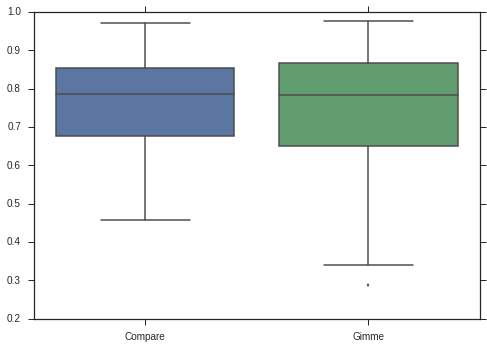

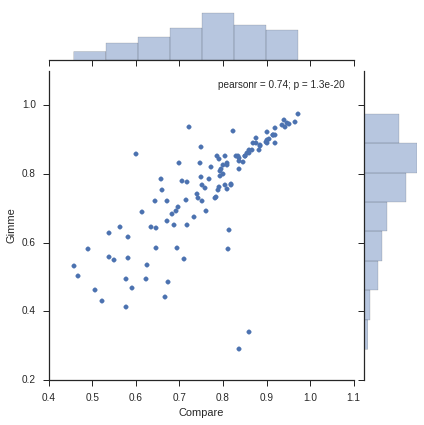

In [190]:
sns.boxplot(all_roc)
sns.jointplot(x="Compare", y="Gimme", data=all_roc)

Get those scenarios in which my approach differes from the other by 0.05 AUC score. This is to see if the difference can be alleviated is I am to focus on the second motif. 

In [734]:
from scipy.stats import describe
describe(Gimme_all_roc["Gimme"], axis=0)

DescribeResult(nobs=110, minmax=(0.28899999999999998, 0.97599999999999998), mean=0.75027272727272698, variance=0.02348146622185154, skewness=-0.8159378283948729, kurtosis=-0.03406367711717406)

In [737]:
Gimme_all_roc.kurtosis(), Gimme_all_roc.skew()

(Compare   -0.471719
 Gimme      0.020930
 dtype: float64, Compare   -0.485370
 Gimme     -0.827262
 dtype: float64)

In [738]:
stats.pearsonr(Gimme_all_roc['Compare'],Gimme_all_roc['Gimme'])
#stats.spearmanr(Gimme_all_roc['Compare'],Gimme_all_roc['Gimme'])
# sp = stats.spearmanr(gimme_ennergy_frame['AUC'],gimme_ennergy_frame['ROC AUC'])[0]
# pv = stats.spearmanr(gimme_ennergy_frame['AUC'],gimme_ennergy_frame['ROC AUC'])[1]

(0.74382633825937983, 1.2931687371175491e-20)

In [739]:
Gimme_all_roc.describe()

,Compare,Gimme
count,110.000000,110.000000
mean,0.761473,0.750273
std,0.123098,0.153237
min,0.458000,0.289000
25%,0.676250,0.650500
50%,0.787000,0.782500
75%,0.854000,0.867250
max,0.972000,0.976000


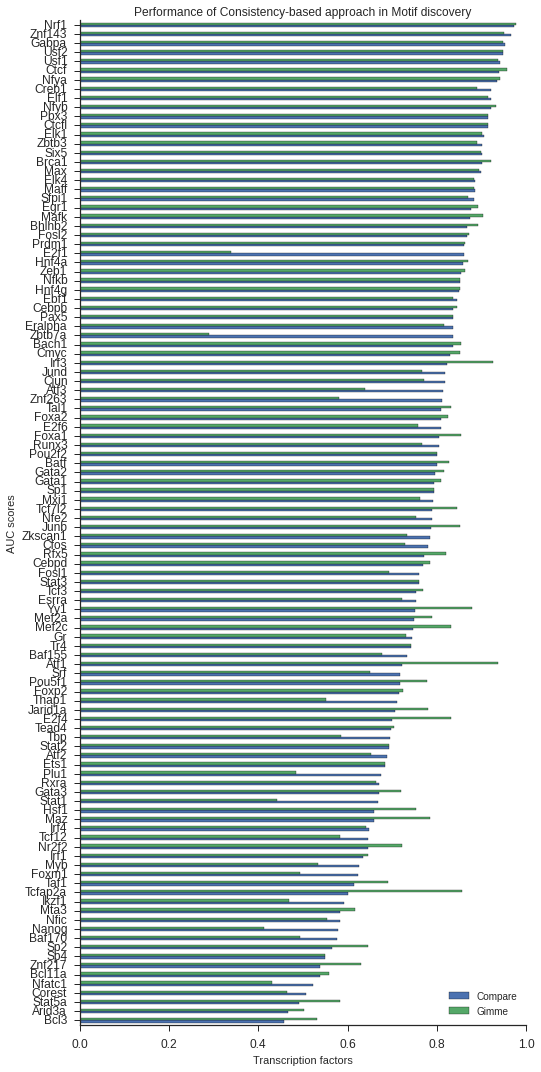

In [741]:
sns.set(style="ticks")
ax = Gimme_all_roc.plot(kind="barh", title="Performance of Consistency-based approach in Motif discovery", figsize=(8,18), fontsize=12)
ax.set_xlabel("Transcription factors")
ax.set_ylabel("AUC scores")
ax.set_axis_on()
sns.despine()
#ax.set_gid()
#ax.set_axis_bgcolor('W')
#ax.annotate("Tomtom correlation mean: %f" % overall.mean()["Tomtom"], (5,-0.1))
#ax.annotate("FISim correlation mean:   %f" % overall.mean()["Fisim"], (5,-0.15))
#ax.annotate("p-value (wilcoxon ranksum test):   %f" % ranksums(overall['Fisim'],overall['Tomtom'])[1], (5,-0.05))
fig = ax.get_figure()
#fig.savefig('/home/kipkurui/Dropbox/PHD/Documents/Phd_Thesis/Chapter4/Figs/tomtom_discover-new.pdf', bbox_inches='tight')

The figure above shows how the motifs identified using TOmtom compare with the Gimme scores. We find that, overally, our approach seems to id better motifs. Howver, there are multiple situations in which the identified motifs differ greatly. Investigating what causes such a difference would be useful for highlighting some of teh factors that influence the performance of our approach. 

In [747]:
ranksums(Gimme_all_roc["Gimme"],Gimme_all_roc["Compare"])

RanksumsResult(statistic=0.0338939187220633, pvalue=0.97296174256042756)

In [ ]:
stats.pearsonr(gimme_ennergy_frame['AUC'],gimme_ennergy_frame['ROC AUC'])
sp = stats.spearmanr(gimme_ennergy_frame['AUC'],gimme_ennergy_frame['ROC AUC'])[0]
pv = stats.spearmanr(gimme_ennergy_frame['AUC'],gimme_ennergy_frame['ROC AUC'])[1]

In [267]:
gimme_roc = pd.read_table("/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/GimmeMars/1.1.1.2.1/1.1.1.2.1_discover_stats.txt", index_col="Motif")
gimme_roc = gimme_roc["roc_auc"].to_frame()
gimme_roc = gimme_roc.sort_values(by="roc_auc", ascending=False)

In [266]:
tomtom_rank = pd.read_table("/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/GimmeMars/1.1.1.2.1/1.1.1.2.1.tomtom_raw.txt", index_col="Test")
tomtom_rank =tomtom_rank["Average"].to_frame(name="Tomtom")
tomtom_rank.index.names = ["Motif"]

In [275]:
gimme_roc_list = list(gimme_roc.index)
tomtom_list = list(tomtom_rank.index)

In [278]:
merged = tomtom_list + gimme_roc_list

In [307]:
for mot in tomtom_list:
    if mot in merged2:
        #print(mot)
        continue
    else:
        print(mot)

In [300]:
merged2 = set(merged)

In [292]:
a = tomtom_rank.drop_duplicates()

### Afew options of getting the kind of figure we are interested in. 

If I have to get the figure like that in NAR paper by Yaron, it could end up bing a manual process. 

/home/kipkurui/anaconda2/lib/python2.7/site-packages/matplotlib/legend.py:611: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f014cc45fd0>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle))


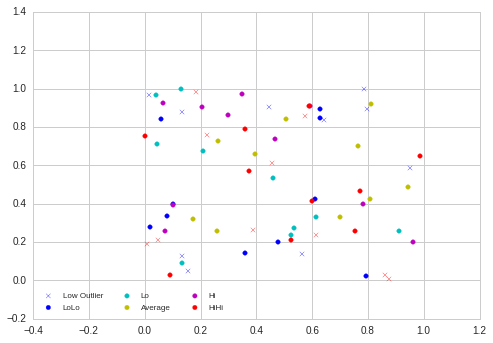

In [93]:
import matplotlib.pyplot as plt
from numpy.random import random

colors = ['b', 'c', 'y', 'm', 'r']

lo = plt.scatter(random(10), random(10), marker='x', color=colors[0])
ll = plt.scatter(random(10), random(10), marker='o', color=colors[0])
l  = plt.scatter(random(10), random(10), marker='o', color=colors[1])
a  = plt.scatter(random(10), random(10), marker='o', color=colors[2])
h  = plt.scatter(random(10), random(10), marker='o', color=colors[3])
hh = plt.scatter(random(10), random(10), marker='o', color=colors[4])
ho = plt.scatter(random(10), random(10), marker='x', color=colors[4])
ho = plt.plot(-0.2,1.2)


plt.legend((lo, ll, l, a, h, hh, ho),
           ('Low Outlier', 'LoLo', 'Lo', 'Average', 'Hi', 'HiHi', 'High Outlier'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)

plt.show()

## Proper Plotting
Put some real thought on how I can get the figures into a scatter plot, or rather in a way that is presentable and easy to interpret

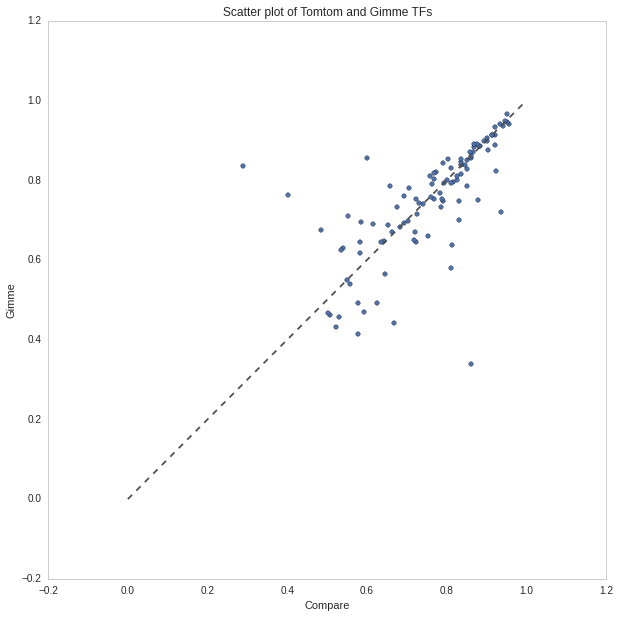

In [113]:
f, ax = plt.subplots(figsize=(10, 10))

ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")

#lo = plt.scatter(random(10), random(10), marker='x', color=colors[0], ax=ax)
t = np.arange(len(all_roc))

all_roc.plot(kind="scatter", x="Compare", y="Gimme", ax=ax, title="Scatter plot of Tomtom and Gimme TFs")

#plt.scatter(x, y, c=t,cmap='coolwarm')
#ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
ax.grid(False)

fig = ax.get_figure()
fig.savefig('/home/kipkurui/Dropbox/PHD/Documents/Phd_Thesis/Chapter4/Figs/Copare_Gimme_corr.pdf', bbox_inches='tight')

The above figure seems to show Consistency approach performing way better than Gimme for majority of the motifs. 

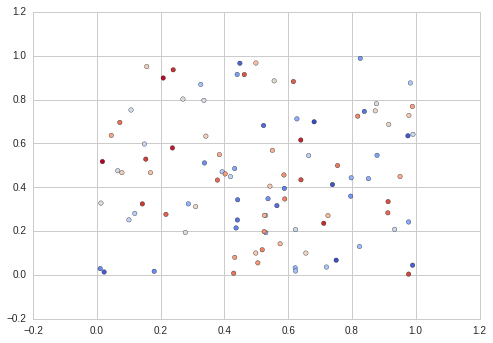

In [102]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.rand(100)
y = np.random.rand(100)
t = np.arange(100)

plt.scatter(x, y, c=t,cmap='coolwarm')
plt.show()

In [89]:
# for tf_id in chipseq:
#     if tf_id == "Tf_id":
#         continue
#     else:
        
#         results_path = "/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/GimmeMars/%s" % tf_id
#         tomtom_raw = "%s/%s.tomtom_raw.txt" % (results_path, tf_id)
#         cluster_key = "%s/%s_discover_cluster/cluster_key.txt" % (results_path, tf_id)
#         yylist = !cut -f1 {tomtom_raw}
#         with open(cluster_key) as cluster:
#             all_clusters = cluster.readlines()
#         mot_lits = []
#         for mot in yylist:
#             for i in all_clusters:
#                 new_list = i.split()[1].split(',')
#                 if mot in new_list:
#                     mot_lits.append(mot)
#                     all_clusters.remove(i)
#         discover_three = mot_lits[:1]
#         pfm_all = "%s/%s_discover_all_motifs.pfm" % (results_path, tf_id)
#         pfm_gimme = '%s/%s_discover_motifs.pwm' % (results_path,tf_id)

#         discover_best = "%s/%s_discover_best.pwm" % (results_path,tf_id)
#         extract_pfm(pfm_all,discover_best,discover_three)


#         gimme_len = !wc -l {results_path}/{tf_id}_discover_motif_report.tsv |cut -f1 -d" "

#         if int(gimme_len[0])-1 <3:
#             #n = int(gimme_len[0])-1
#             n=1
#         else:
#             n = 1
#         gimme_three = ! cut -f1 {results_path}/{tf_id}_discover_motif_report.tsv |head -2 |tail -{n}
#         gimme_out = '%s/%s_gimme_best.pwm' % (results_path,tf_id)
#         extract_pfm(pfm_gimme,gimme_out,gimme_three)

#         !cat {results_path}/{tf_id}_gimme_best.pwm {results_path}/{tf_id}_discover_best.pwm >{results_path}/{tf_id}_combined_best.pwm

#         print(chipid2name[tf_id])

#         !gimme roc {results_path}/{tf_id}_combined_best.pwm {results_path}/{tf_id}_test.fa {results_path}/{tf_id}_bg.fa

In [103]:
all_roc.to_csv("Compare", sep="\t")

In [115]:
test = pd.read_table("Compare")

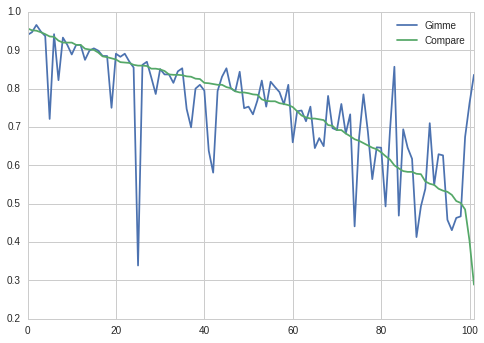

In [116]:
test.plot()

In [400]:
gimmemotifs.core.GimmeMotifs.run_full_analysis()

TypeError: unbound method run_full_analysis() must be called with GimmeMotifs instance as first argument (got nothing instead)

In [96]:
!gimme roc {results_path}/{tf_id}_combined_best.pwm {results_path}/{tf_id}_test.fa {results_path}/{tf_id}_bg.fa

Motif	ROC AUC	MNCP	Enr. at 5% FDR	Max enr.
Posmo_4	0.818	1.750373	13.29	116.50
BioProspector_w6_5	0.784	1.629351	8.16	21.67
GimmeMotifs_2	0.492	0.986362	1.06	6.50
GimmeMotifs_1	0.767	1.675174	11.37	180.50
Posmo_3	0.492	0.986397	1.06	6.50


In [84]:
gimme_len = !wc -l {results_path}/{tf_id}_discover_motif_report.tsv |cut -f1 -d" "

Note to Self: I need to find a way of dealing with those motiofs that did not seem to run to completeion and those that may contain duplicates due to repeat analsis. Also, I need to arrange each of the steps in a proper order to ensure everything is easy to re-run from start to finish. Every step should be documented. Any ommision should also be represented in the whole analytics. 

Also consider the effect of negative or background sequences in the analysis. Although some bias would be expected, it will affect both sets in a similar way. 

In [ ]:
tf_list = "cebpb ctcf egr1 elf1 ets1 gata3 hnf4a mafk max mef2a nrf1 pax5 pou2f2 prdm1 sp1 srf tcf3 yy1".split()
gimme_ennergy_frame=pd.DataFrame()
for tf in tf_list:
    tests = pd.read_table("/home/kipkurui/Project/Motif_Assessment/GIMME_ROC/%s/%s.gimme" % (tf.capitalize(),tf.capitalize()), index_col="Motif")
    b = tests.sort_index()[['ROC AUC']]
    raw_score = "/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/Kibet-F1000Research/ChIP_seq/Results"
    auc_raw = pd.read_table("%s/%s/%s_auc.rawscores" % (raw_score,tf,tf), index_col="Motif")
    auc_raw = auc_raw.sort_index()
    added = auc_raw.T.append(b.T).T
    gimme_energy = added[['energy','ROC AUC']]
    
    #gimme_energy = gimme_energy.corr()
    
    #a = gimme_energy['energy']
    a = gimme_energy.mean().to_frame(name=tf)
    gimme_ennergy_frame = gimme_ennergy_frame.append(a.T)
    
    #sns.clustermap(added.corr(method="spearman"), annot=True)

In [461]:
#3.5.3.0.3, 1.2.4.1.12
chipseq.remove("3.5.3.0.3")

In [1]:
gimme_ennergy_frame=pd.DataFrame()
for tf_id in chipseq:
    results_path ="/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/GimmeRoc/%s" % tf_id
    energy = pd.read_table("/home/kipkurui/Project/Motif_Assessment/PAPER_Assessment_Data/NAR_Paper/ChIP-seq/Results/%s/%s.energy" % (tf_id,tf_id), index_col="Motif")
    
    auc_raw = energy.sort_index()
    
    tests = pd.read_table("%s/%s.gimme" % (results_path,tf_id), index_col="Motif")
    b = tests.sort_index()
    if len(auc_raw) == len(b):
        added = auc_raw.T.append(b.T).T
        gimme_energy = added[['AUC','ROC AUC']]
        a = gimme_energy.mean().to_frame(name=pbmchip2name[tf_id])
        gimme_ennergy_frame = gimme_ennergy_frame.append(a.T)
    
    
    
    
    
    
    
    

NameError: name 'pd' is not defined

In [612]:
gimme_ennergy_frame.corr(method='spearman')

,AUC,ROC AUC
AUC,1.000000,0.995129
ROC AUC,0.995129,1.000000


In [616]:
?scipy.corrcoef(gimme_ennergy_frame['AUC'],)

In [638]:
import scipy.stats  as stats
stats.pearsonr(gimme_ennergy_frame['AUC'],gimme_ennergy_frame['ROC AUC'])
sp = stats.spearmanr(gimme_ennergy_frame['AUC'],gimme_ennergy_frame['ROC AUC'])[0]
pv = stats.spearmanr(gimme_ennergy_frame['AUC'],gimme_ennergy_frame['ROC AUC'])[1]

In [448]:
gimme_energy = added[['AUC','ROC AUC']]

In [656]:
gimme_ennergy_frame.columns = ["Enery Scoring", 'Gimme roc']

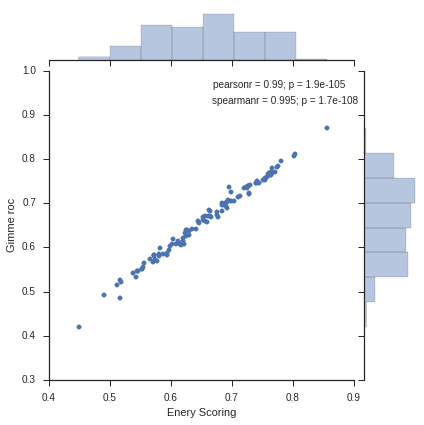

In [659]:
p = sns.jointplot(x="Enery Scoring", y="Gimme roc", data=gimme_ennergy_frame)
sns.set_context("notebook")
p.fig.text(0.5, 0.75, "spearmanr = %.3f; p = %.1e"%(sp,pv), ha ='left', fontsize = 10)
plt.savefig('/home/kipkurui/Dropbox/PHD/Documents/NAR_Paper/Working_draft/Figs/Gimme_energy-jointplot.pdf', bbox_inches='tight')

In [1]:
import pandas as pd

In [14]:
pd.read_table("/home/kipkurui/Dream_challenge/Hnf4a.energy", header=None)

,0,1
0,MA0114.2.JASPAR,0.762911
1,HNF4A_f1.HOCOMOCO,0.761129
2,HNF4a.HOMER,0.760758
3,HNF4_disc1.POUR,0.757040
4,HNF4_disc2.POUR,0.707730
5,HNF4_disc3.POUR,0.701518
6,HNF4_disc4.POUR,0.658154
7,HNF4_disc5.POUR,0.705407
8,HNF4A_DBD_1.JOLMA,0.733422
9,HNF4A_DBD_2.JOLMA,0.751508


In [8]:
nanog = pd.read_clipboard()

In [10]:
nanog.to_csv("/home/kipkurui/Dream_challenge/Nanog.energy", index_label=False, header=False, index=False, sep="\t")

In [11]:
Foxa1 = pd.read_table("/home/kipkurui/Dream_challenge/Foxa1.energy")

In [12]:
Foxa1

,MA0148.3.JASPAR,0.709121
0,FOXA1_f1.HOCOMOCO,0.679025
1,FOXA1_1.HOMER,0.695815
2,FOXA1_2.HOMER,0.692535
3,FOXA_disc1.POUR,0.697069
4,FOXA_disc2.POUR,0.647581
5,FOXA_disc3.POUR,0.658838
6,FOXA_disc4.POUR,0.622635
7,FOXA_disc5.POUR,0.652364
8,Fork_head.MacIsaac,0.675156
9,FOX01.3DFOOTPRINT,0.629181
